In [42]:
#IMPORT PACKAGES
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso,LassoCV
from sklearn.metrics import (r2_score)
from sklearn.preprocessing import StandardScaler, RobustScaler #Scaling the data
import warnings
warnings.filterwarnings('ignore') #ignore all warnings

LOAD DATASET

(777, 18)
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         

<Axes: >

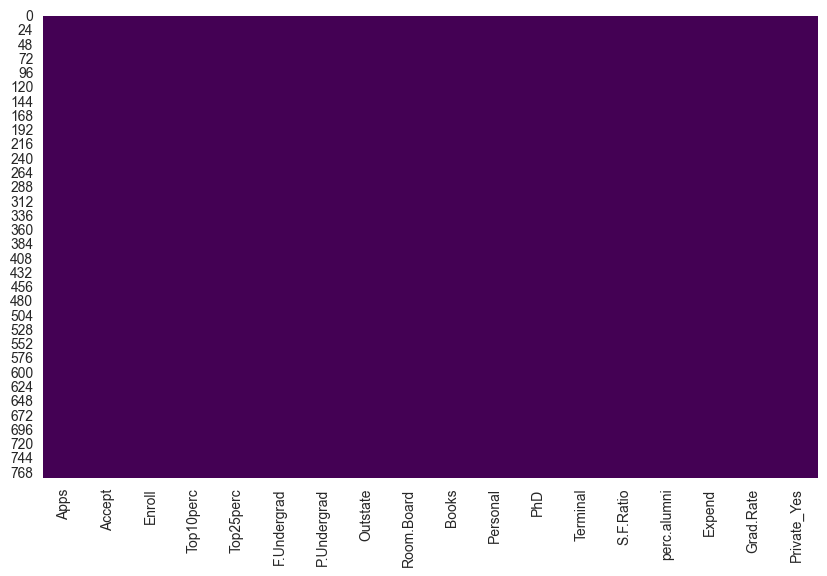

In [43]:
college_data = pd.read_csv('College.csv')

#drop the unamed column
college_data =college_data.drop(['Unnamed: 0'], axis=1)
print(college_data.shape)
print(college_data.head())


#create dummy column with one_Hot Encoding  for Private
dummies = pd.get_dummies(college_data[['Private']], dtype=int).astype('category')
print(dummies.head())


#drop private column
college_data = college_data.drop(['Private'], axis=1)
print(college_data.shape)

#concatenate only private college  to the original data
college_data = pd.concat([college_data, dummies[['Private_Yes']]], axis=1)
print(college_data.shape)
print(college_data.head())
#check for missing values
missing_values = college_data.isnull()
#create heat map for missing values if any
plt.figure(figsize=(10,6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)

1. Perform data analysis on the dataset with Grad.Rate as the response. Comment on the output. Did you find any patterns.
Comments will be on the word document

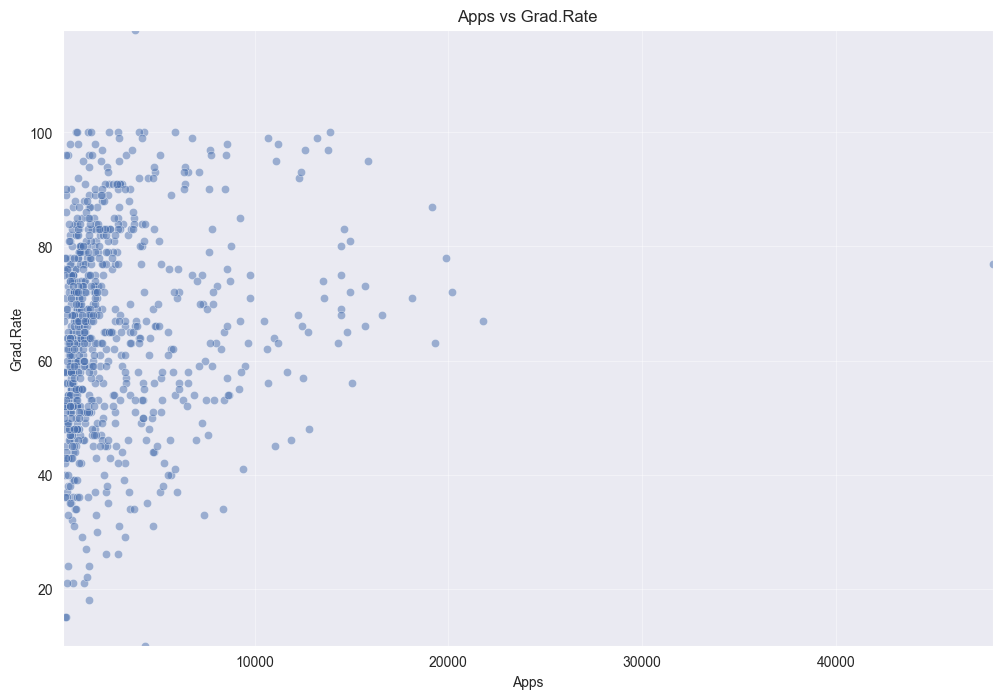

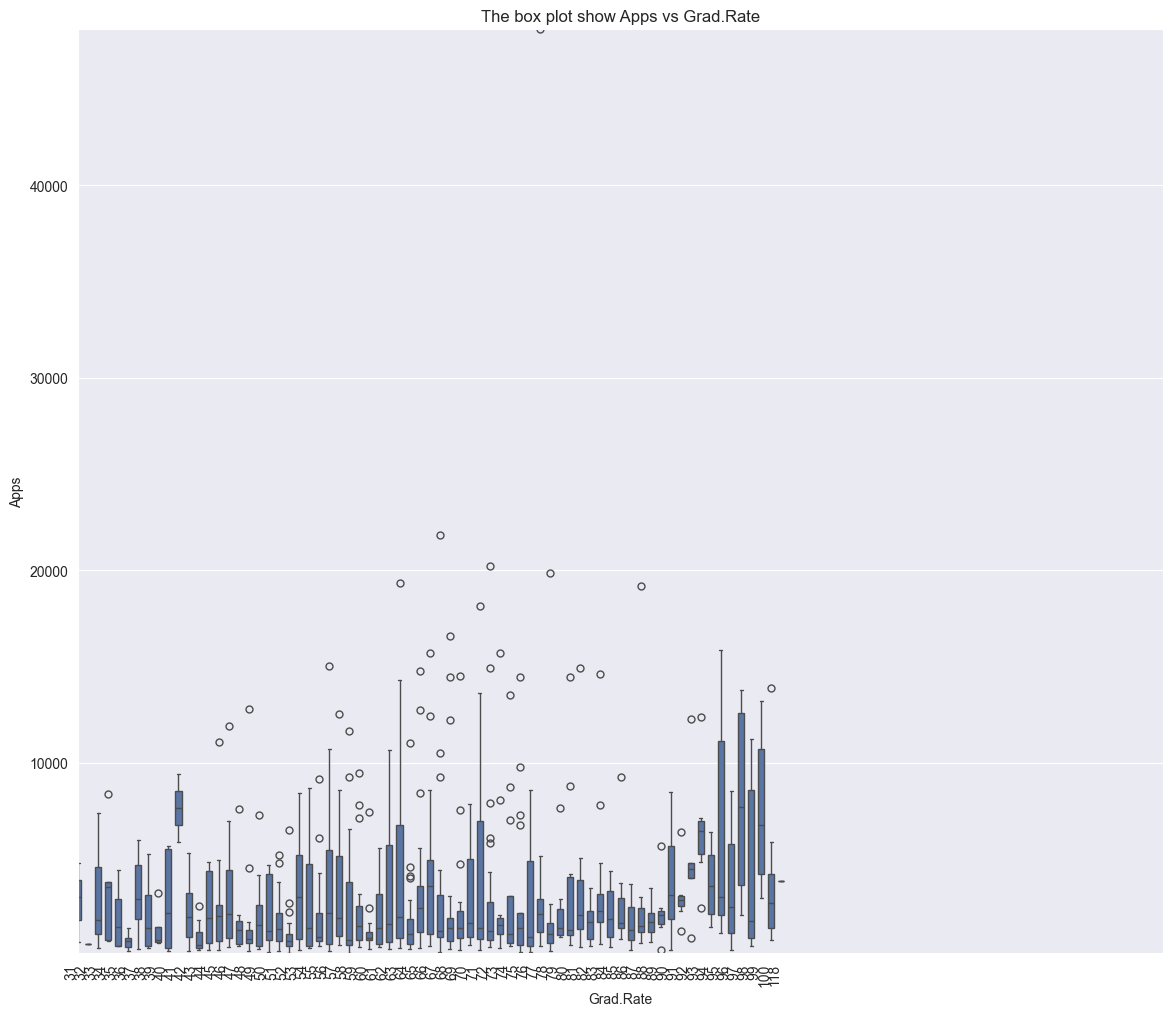

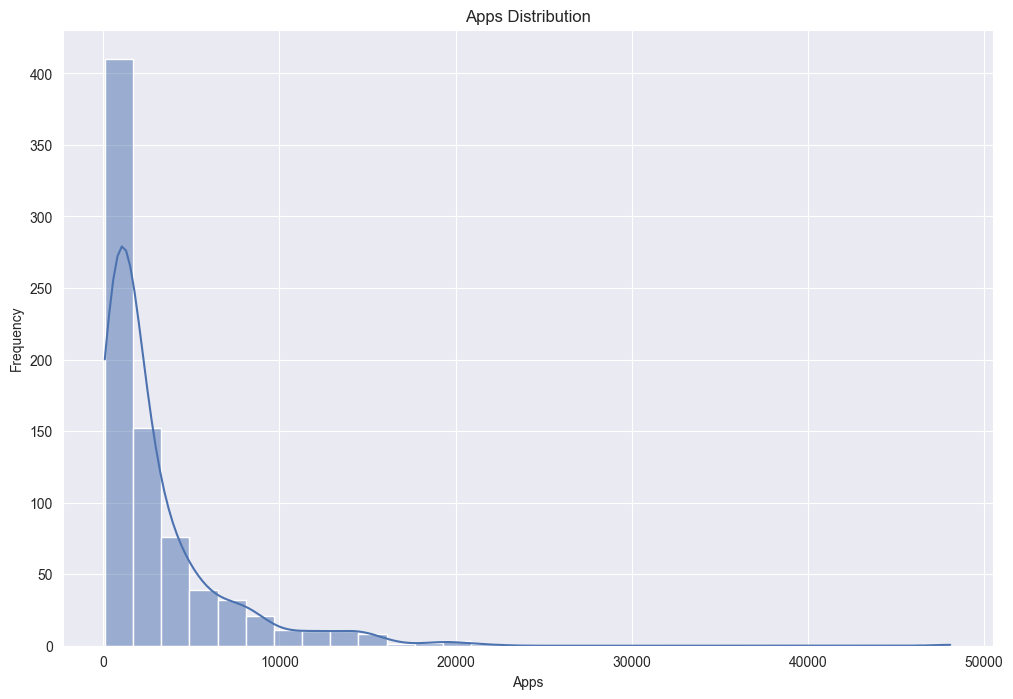

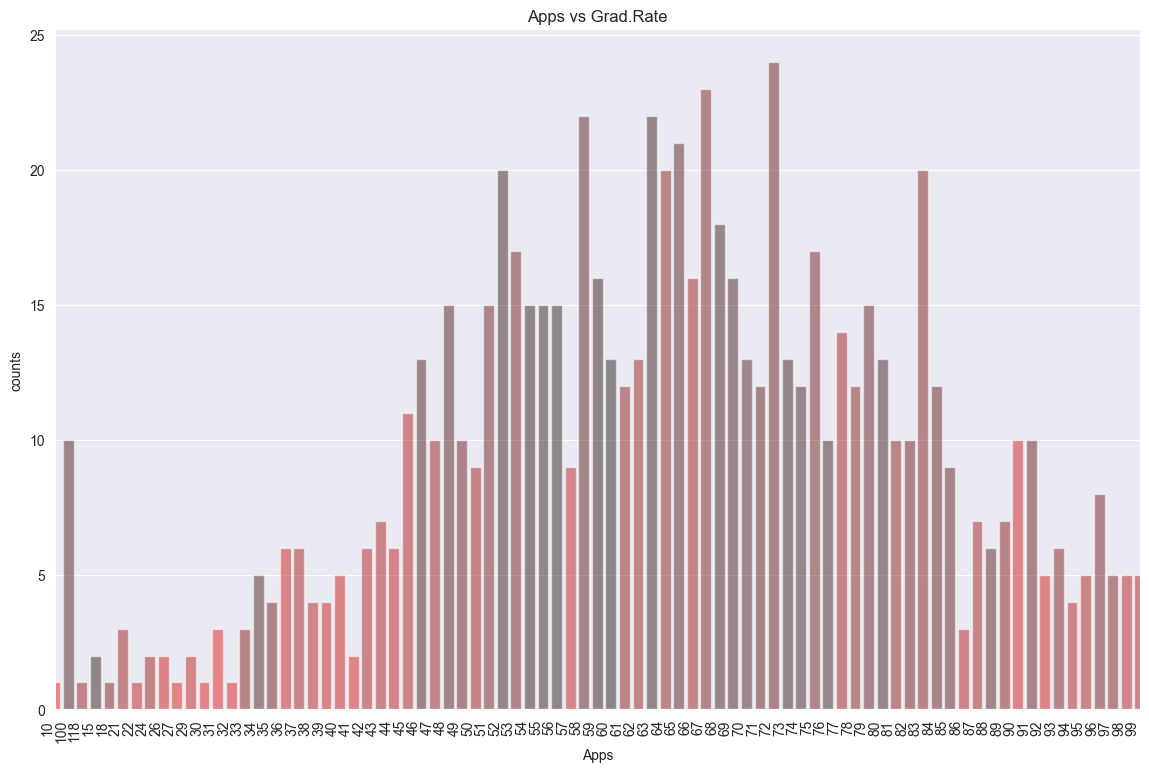

The correlation between Grad.Rate and Apps is 0.14675459955109244


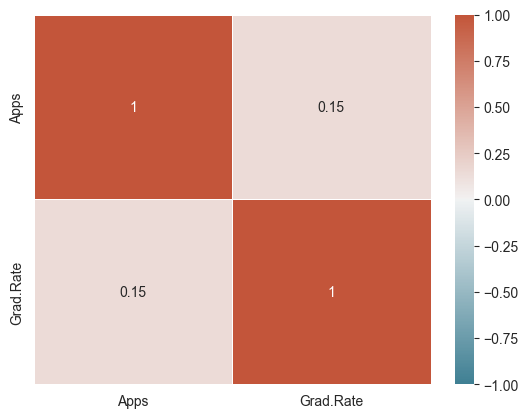

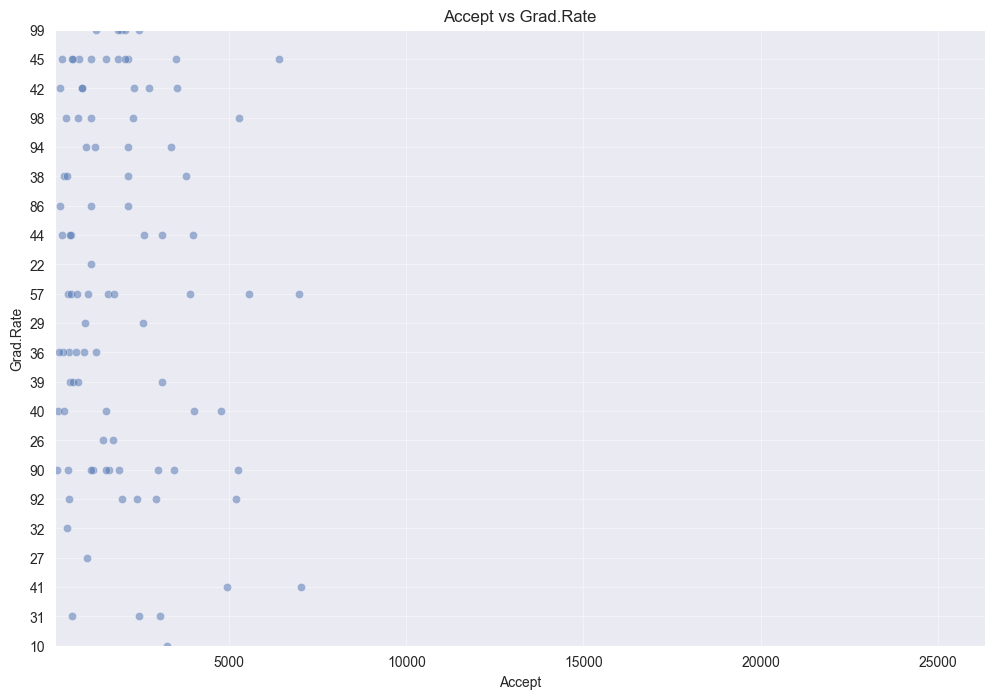

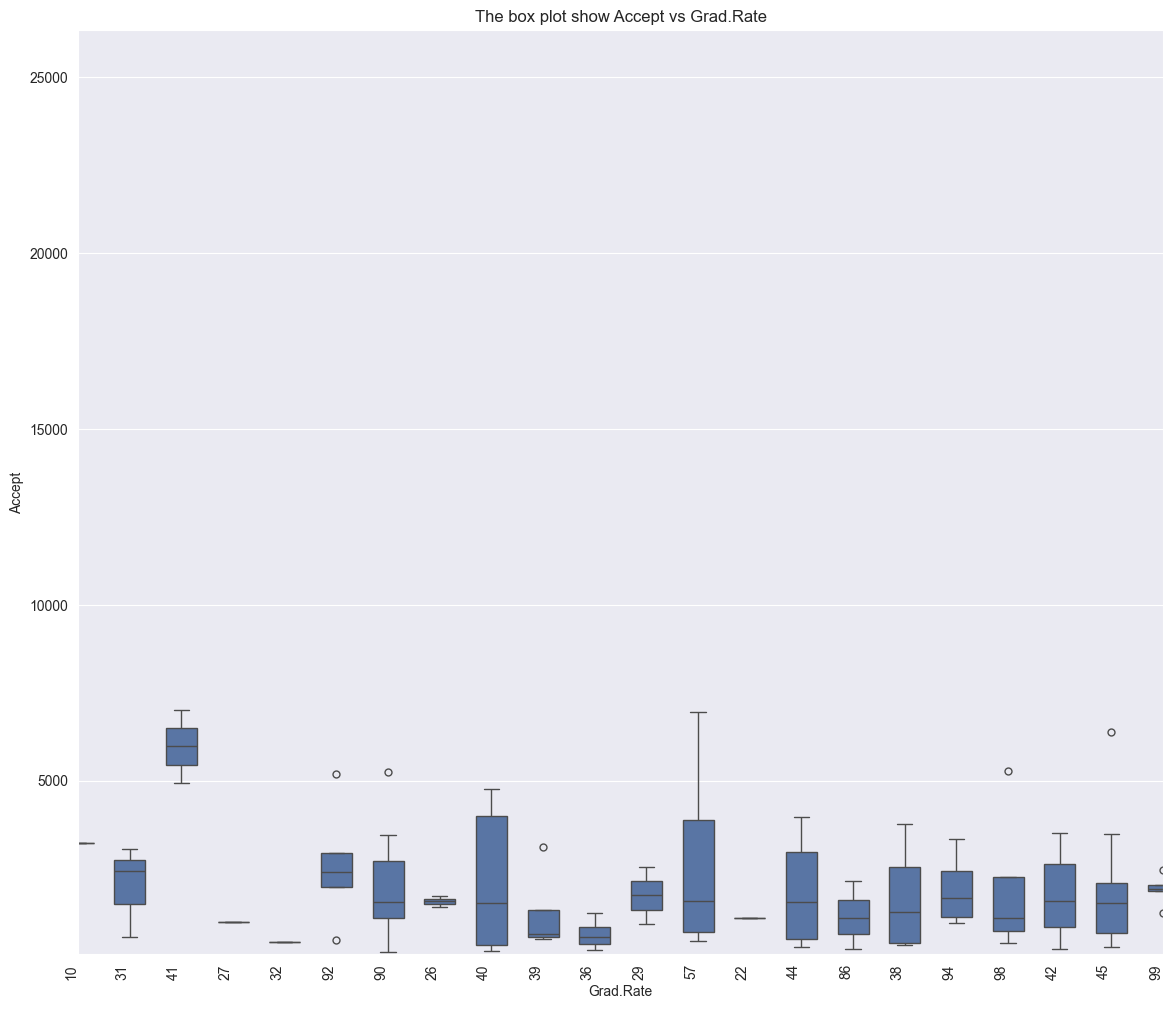

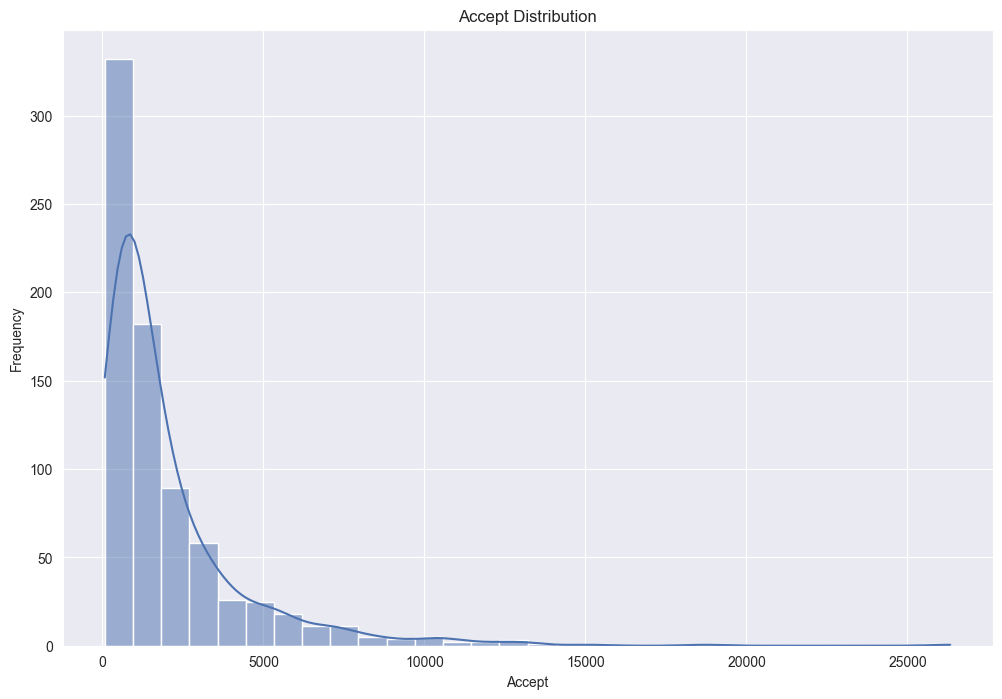

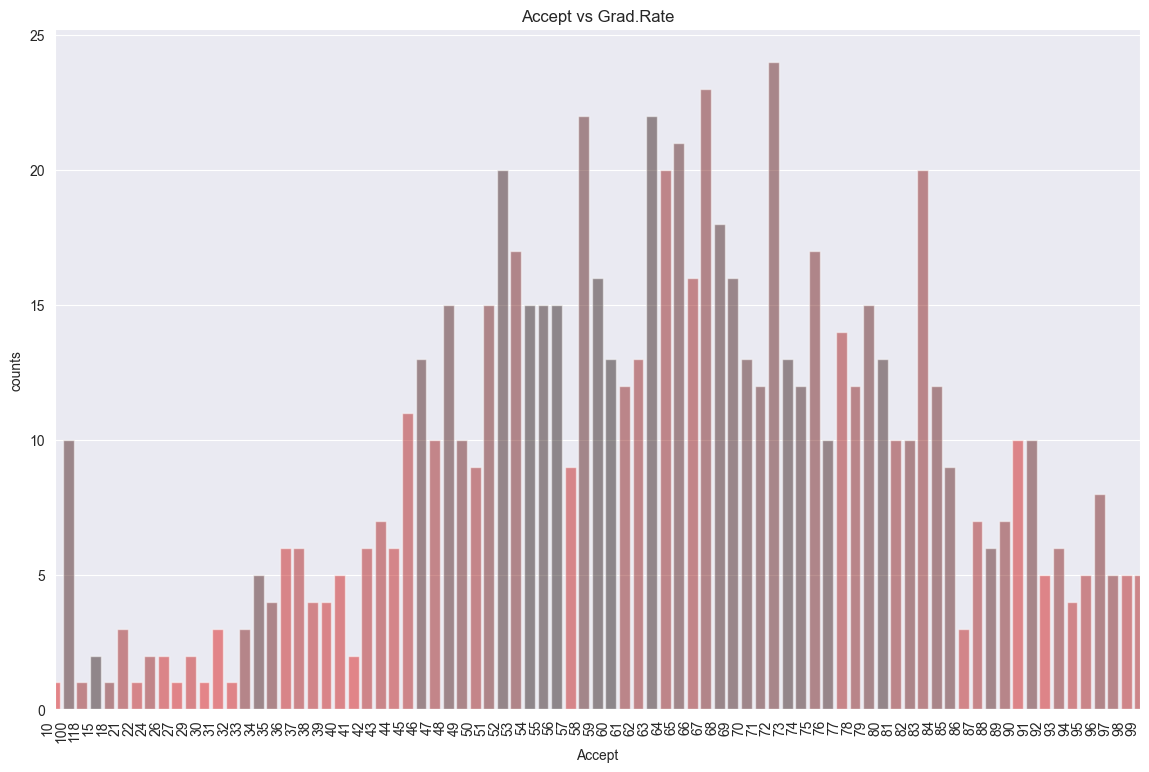

The correlation between Grad.Rate and Accept is 0.06731254983602432


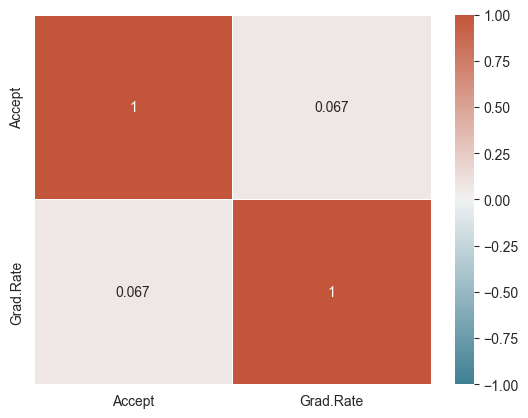

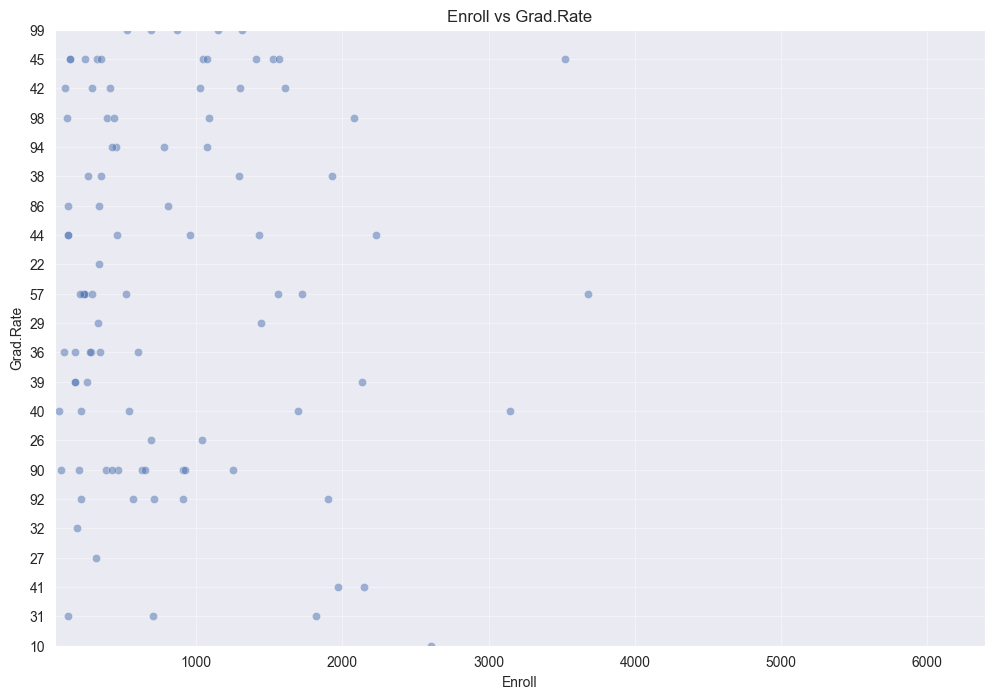

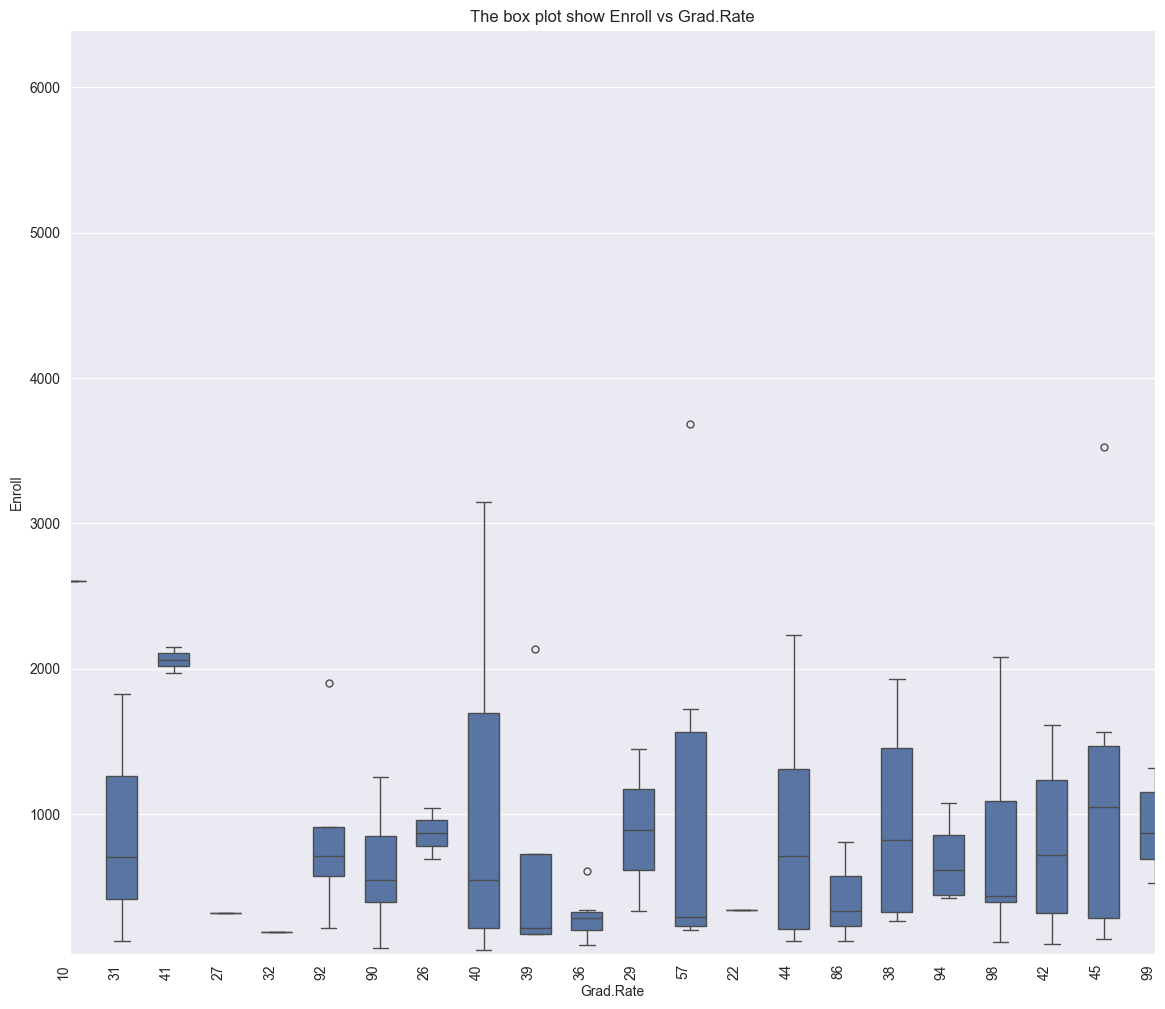

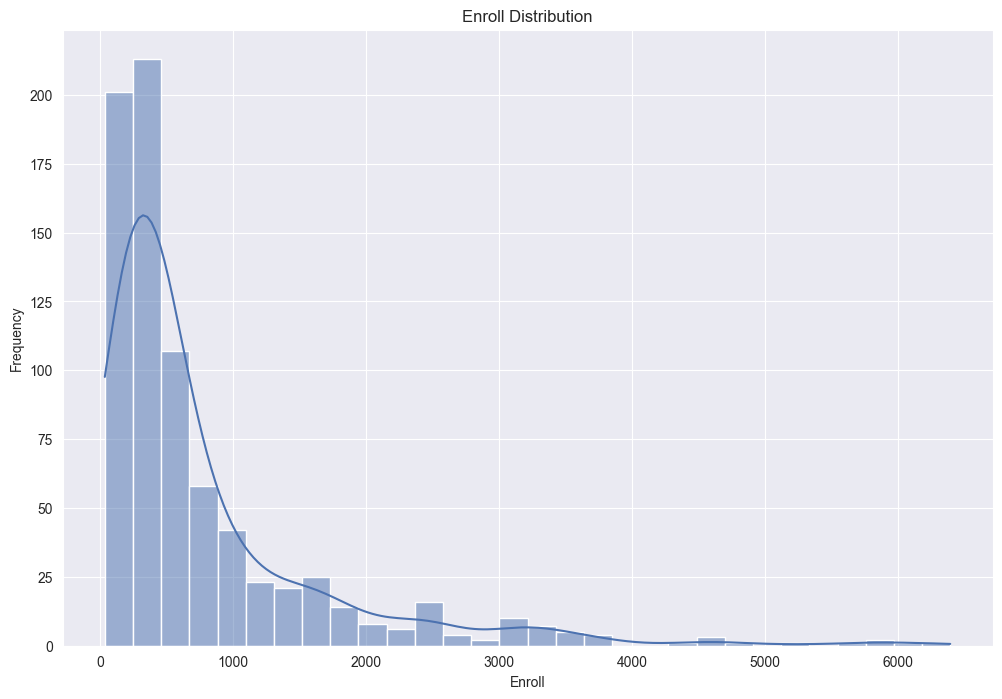

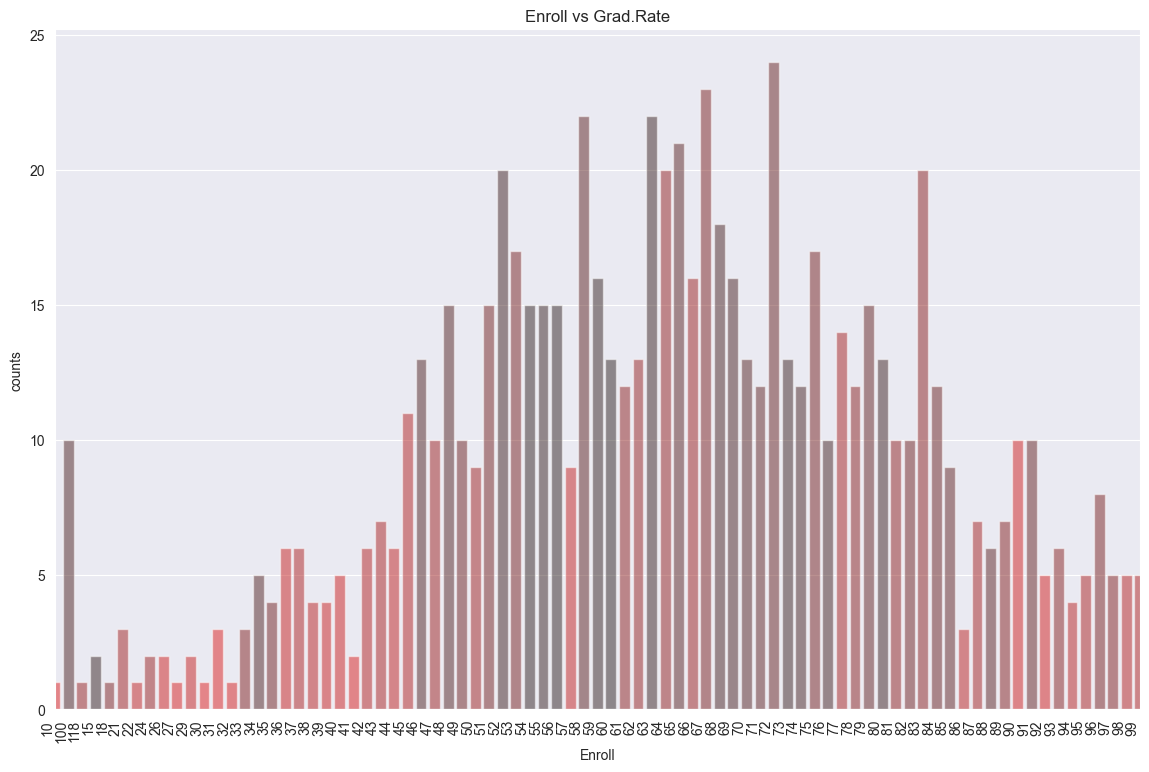

The correlation between Grad.Rate and Enroll is -0.022341038639948355


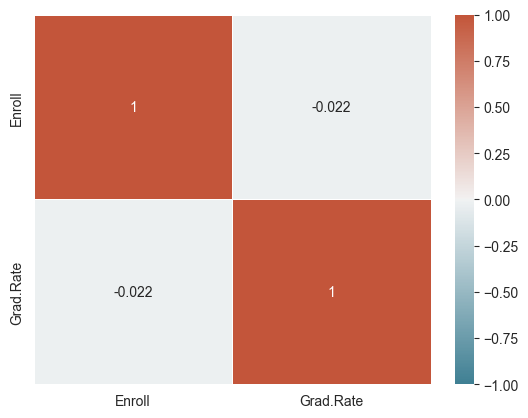

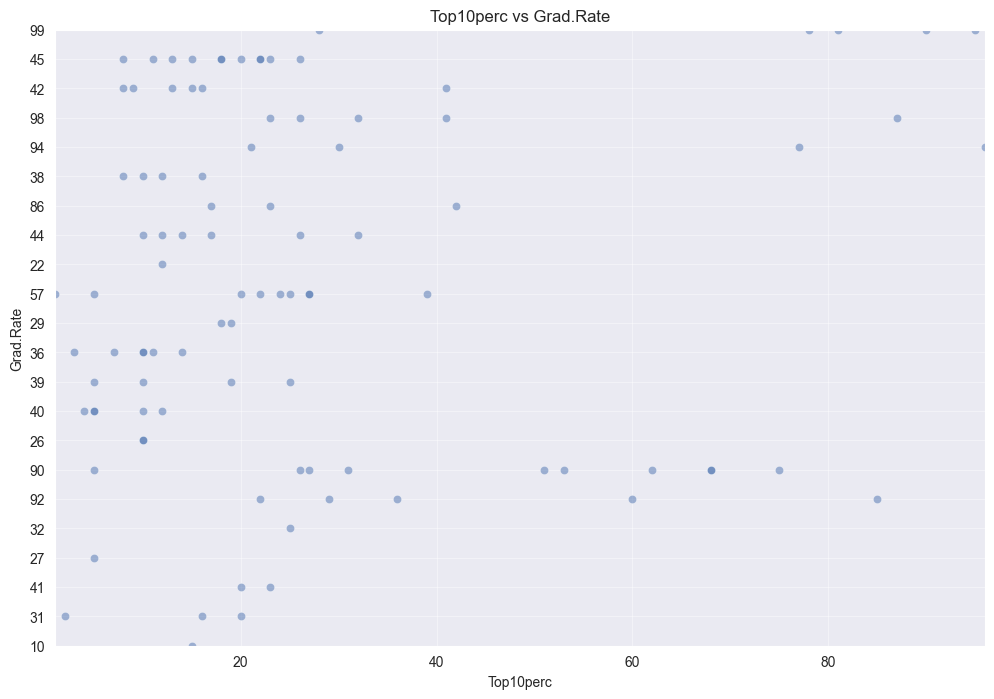

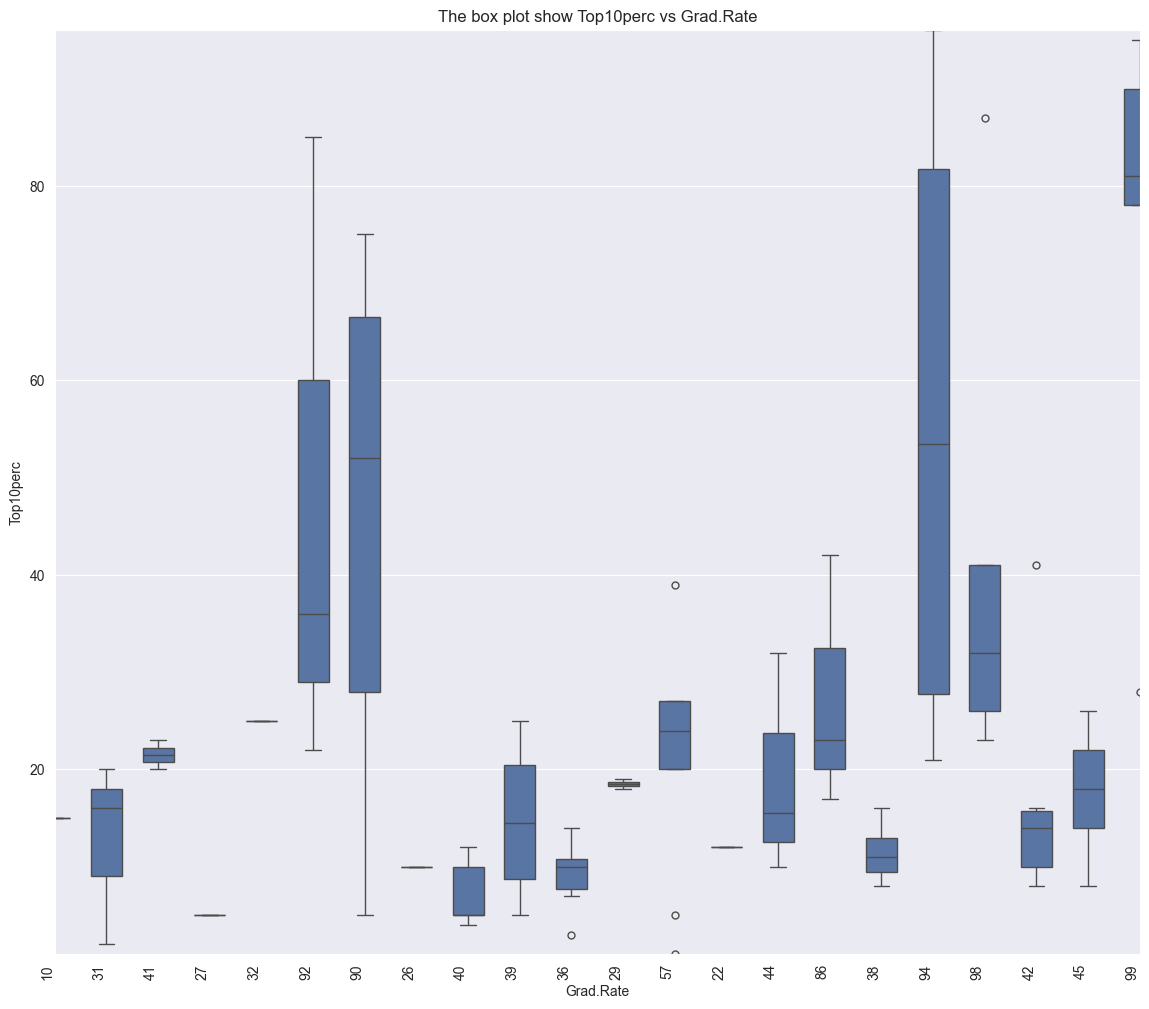

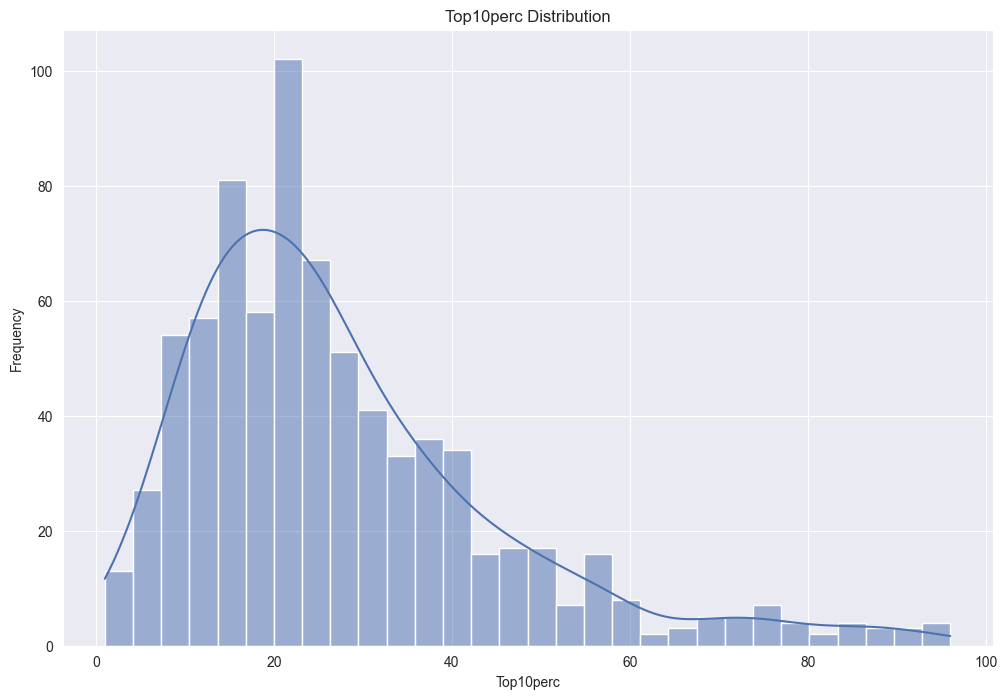

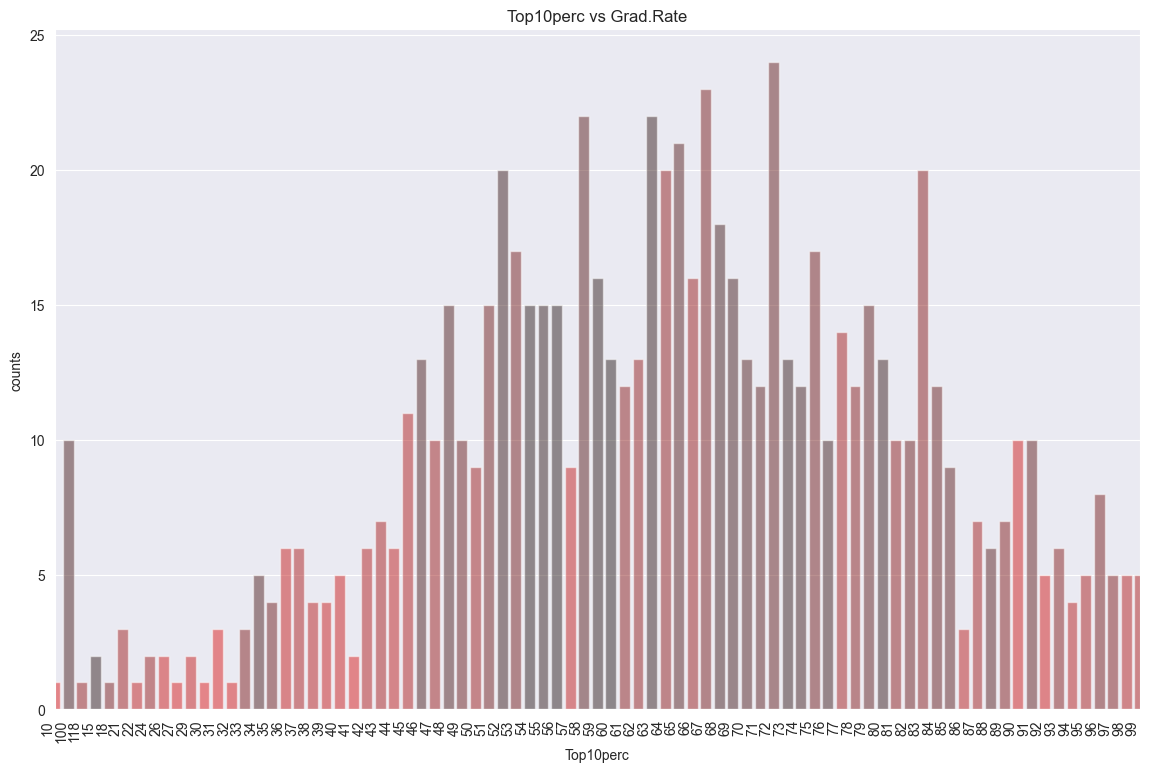

The correlation between Grad.Rate and Top10perc is 0.49498923480133983


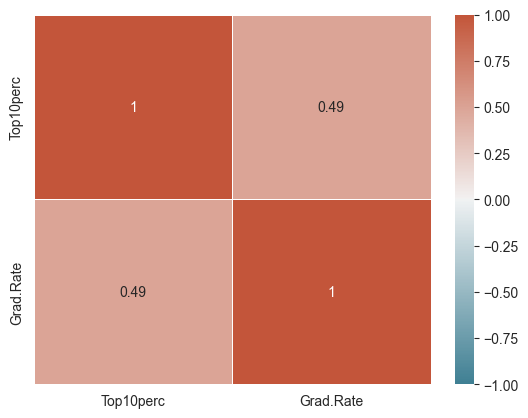

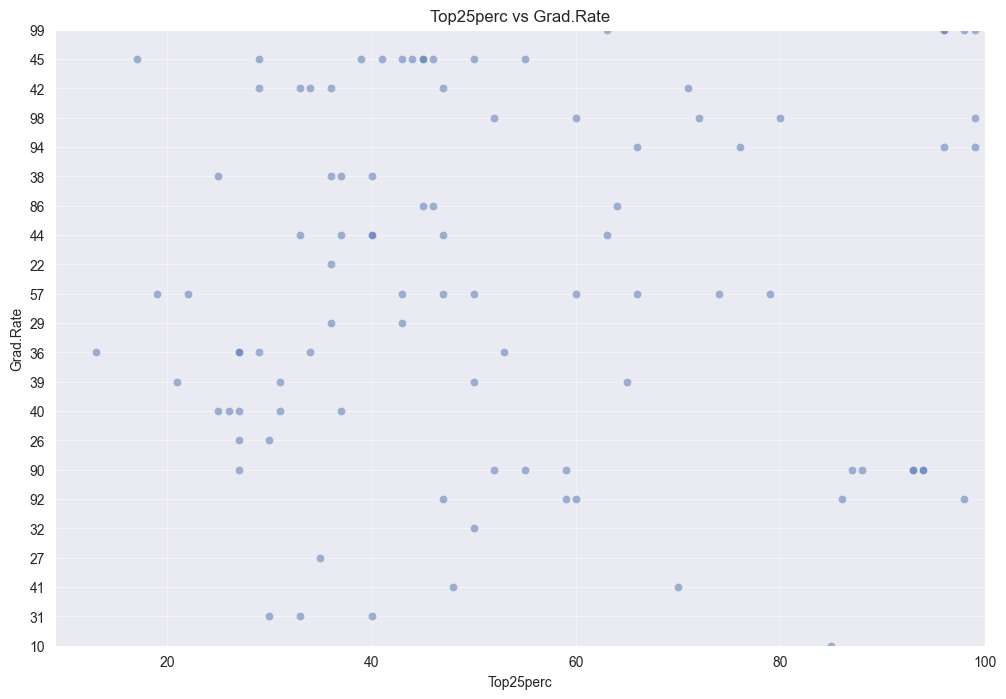

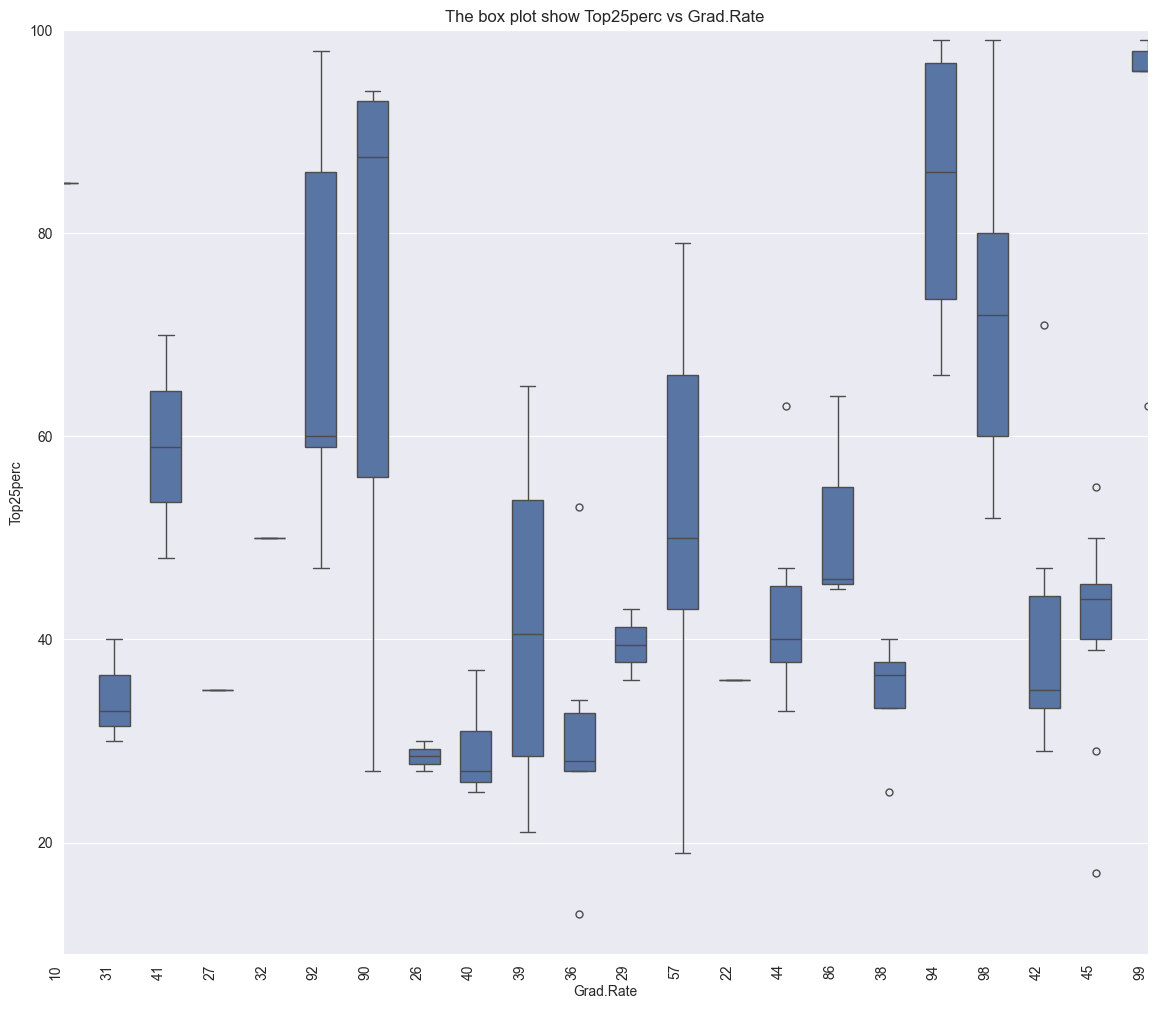

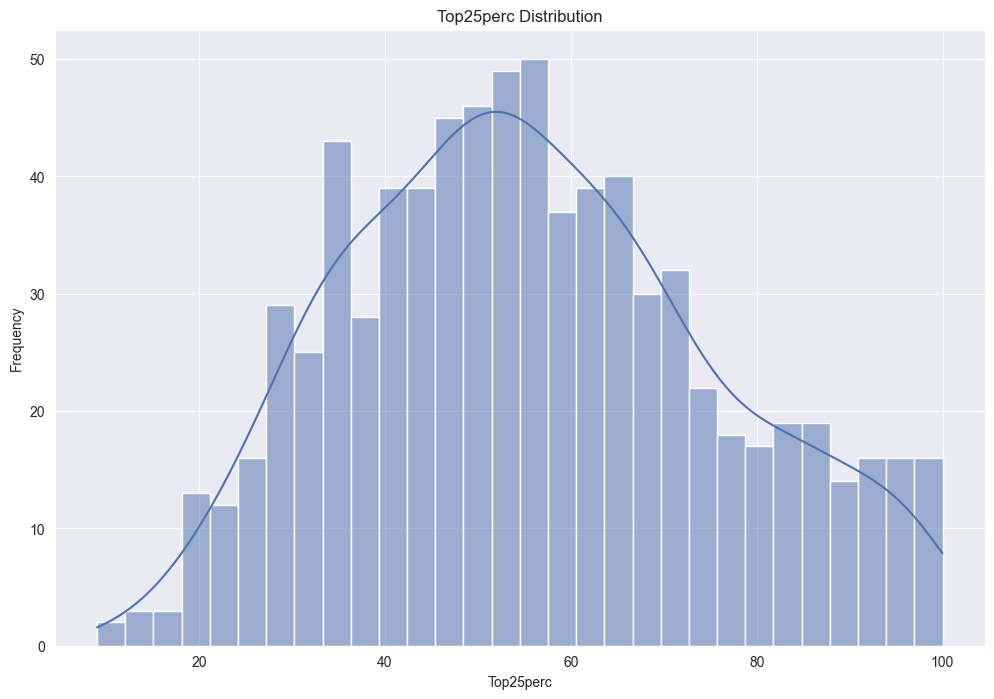

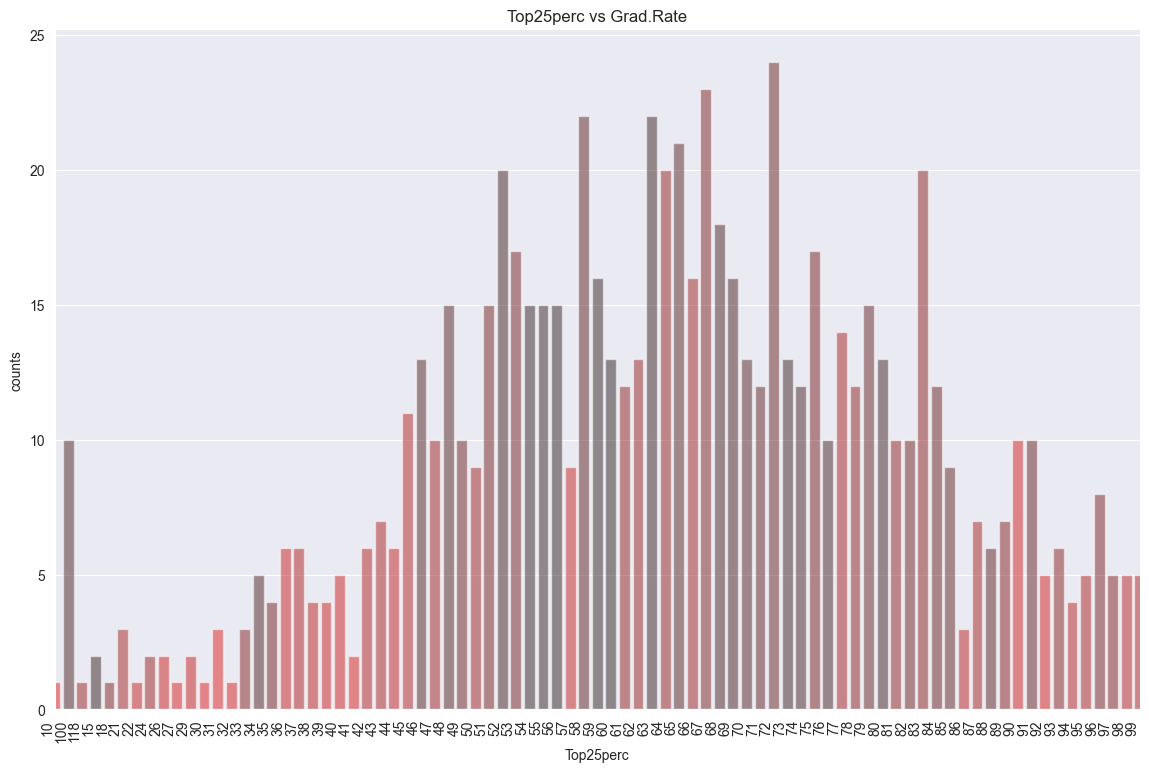

The correlation between Grad.Rate and Top25perc is 0.4772811643757831


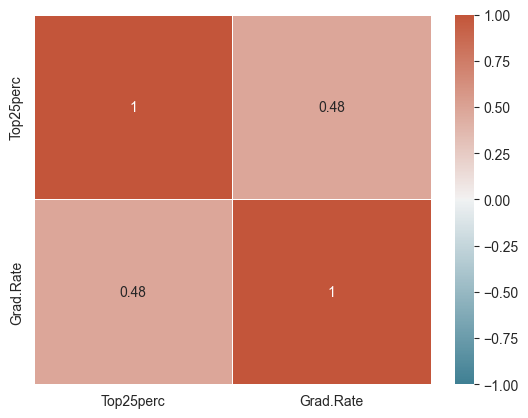

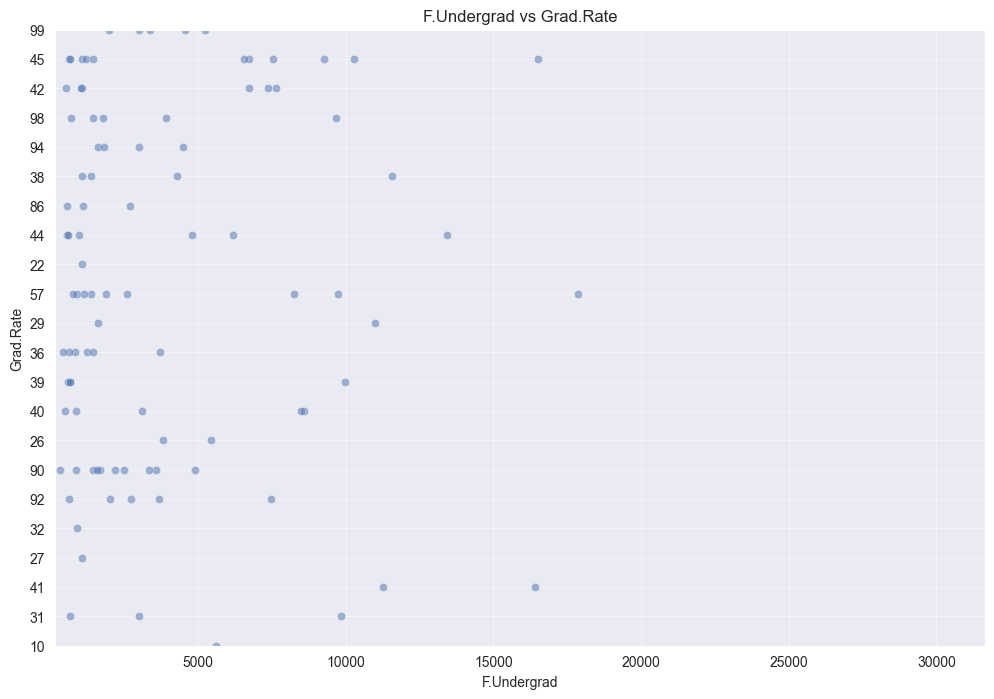

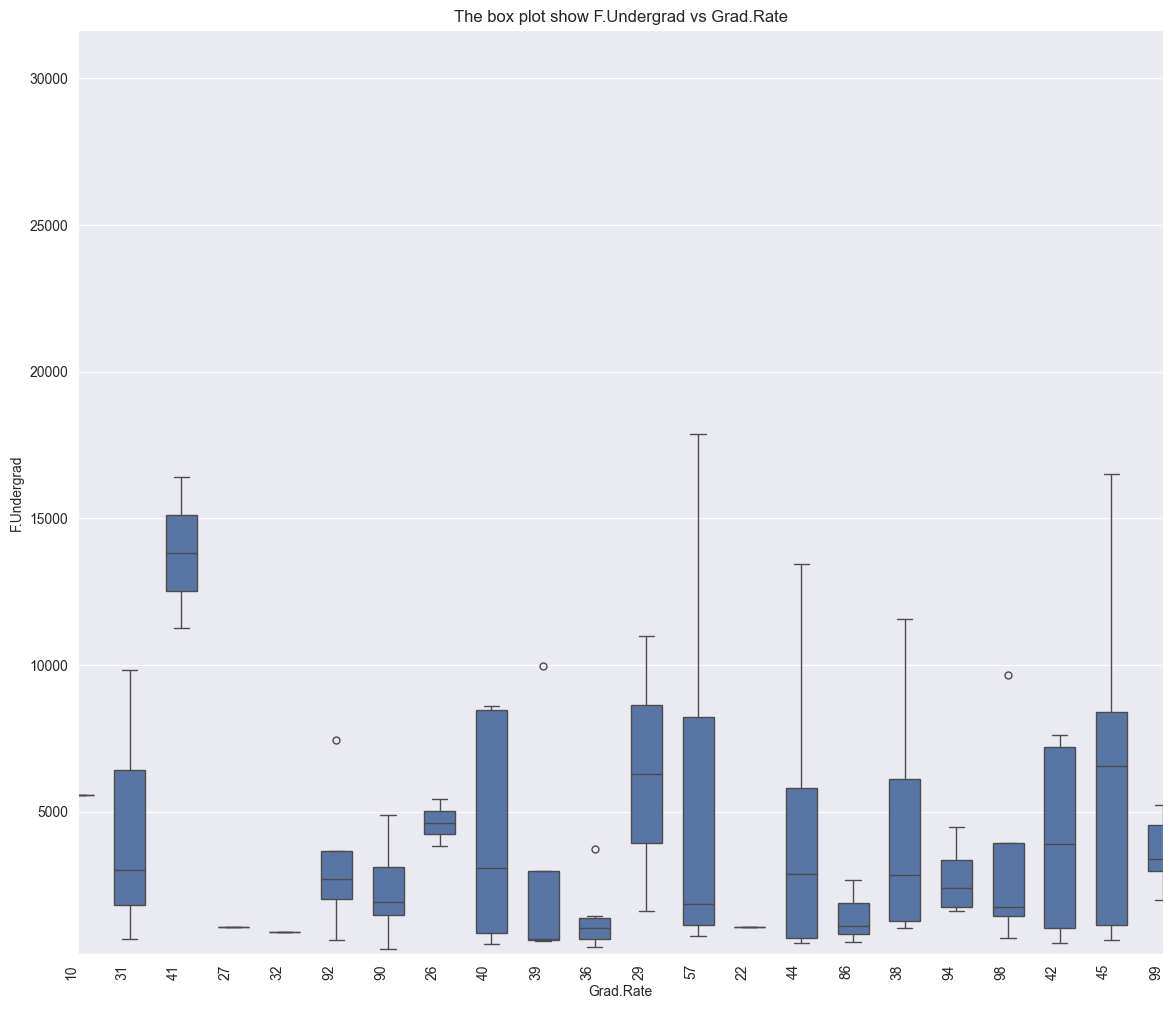

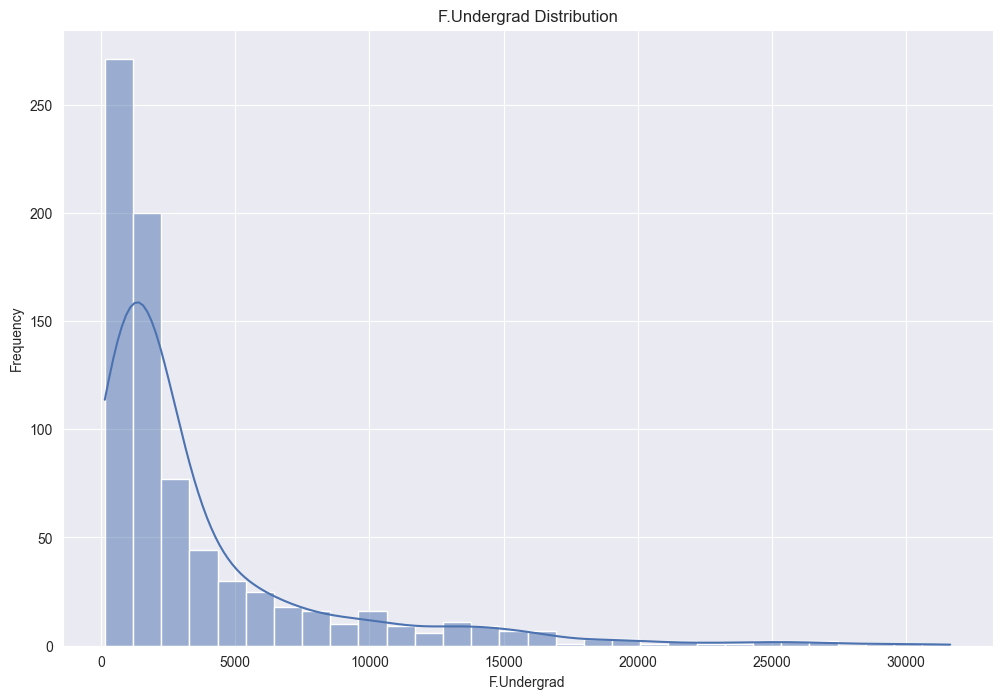

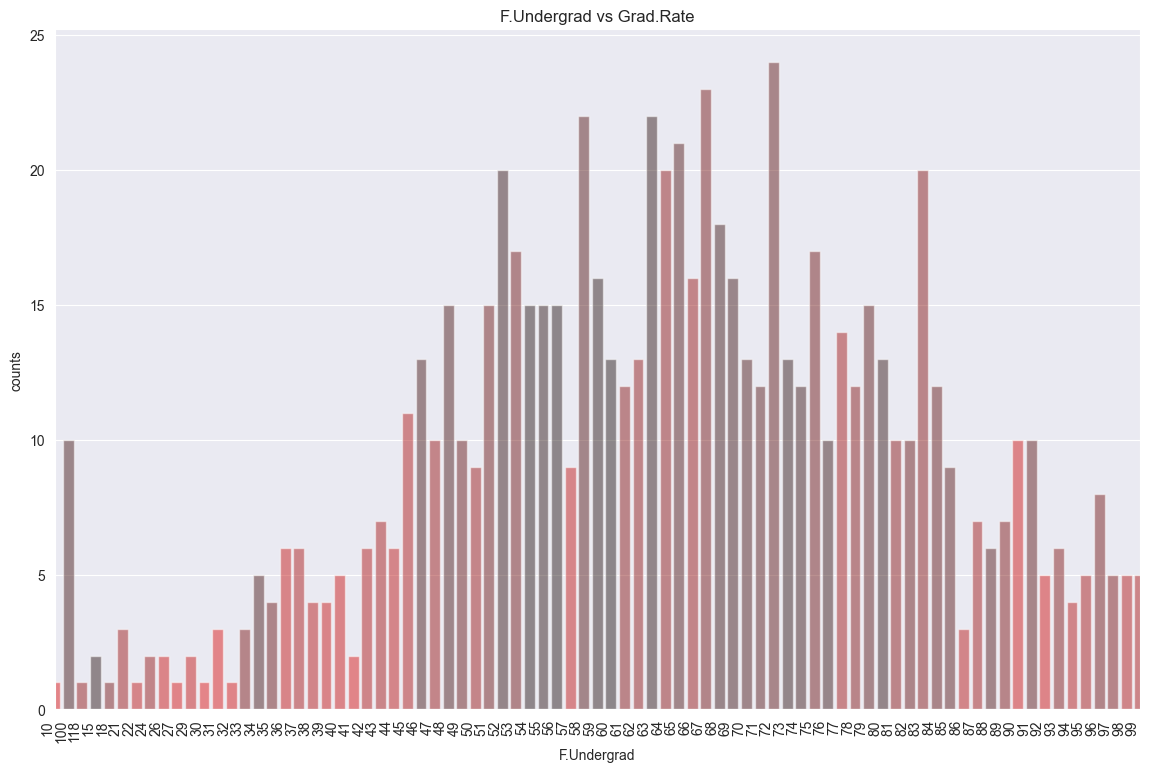

The correlation between Grad.Rate and F.Undergrad is -0.07877312893232158


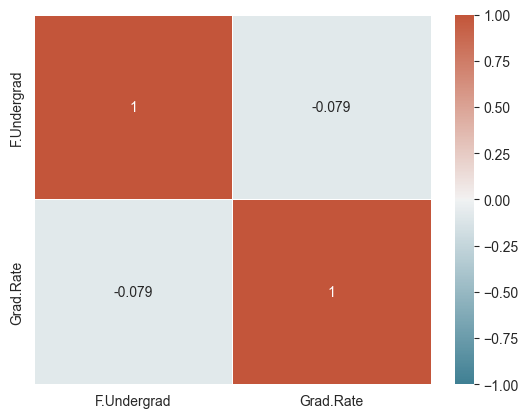

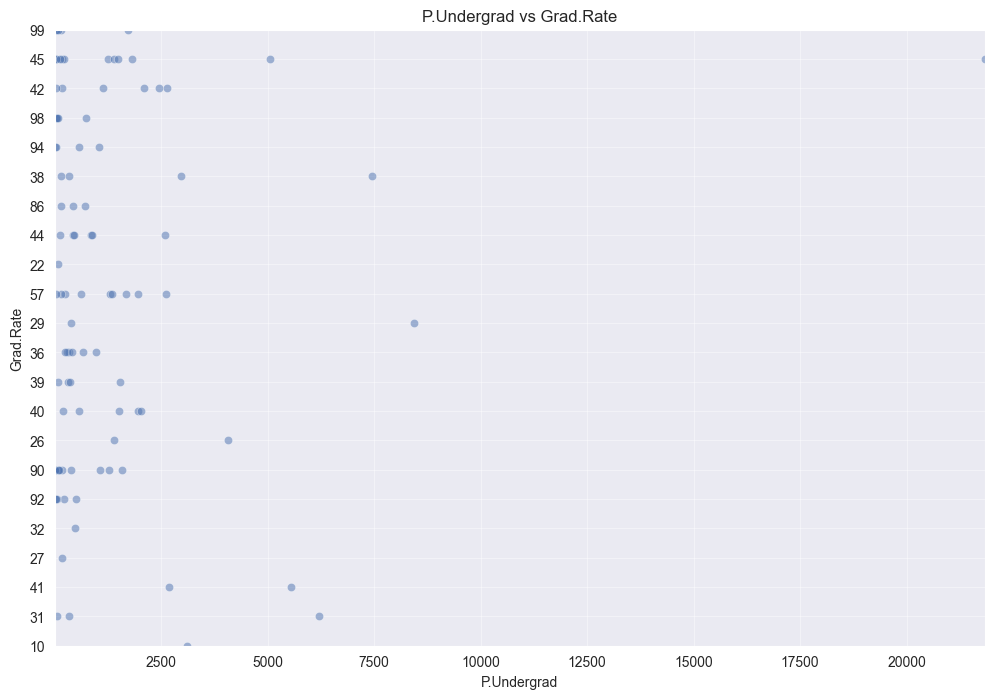

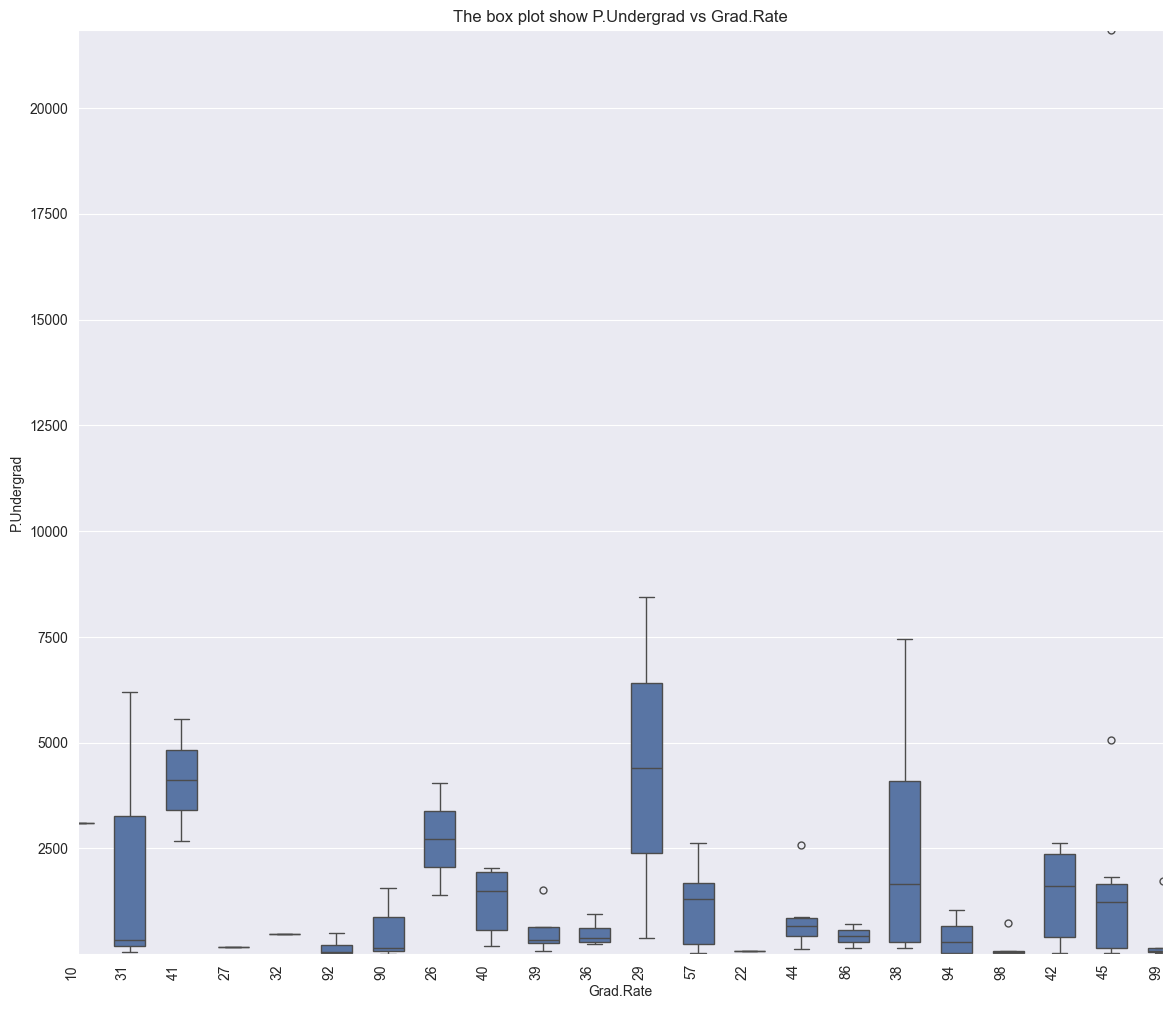

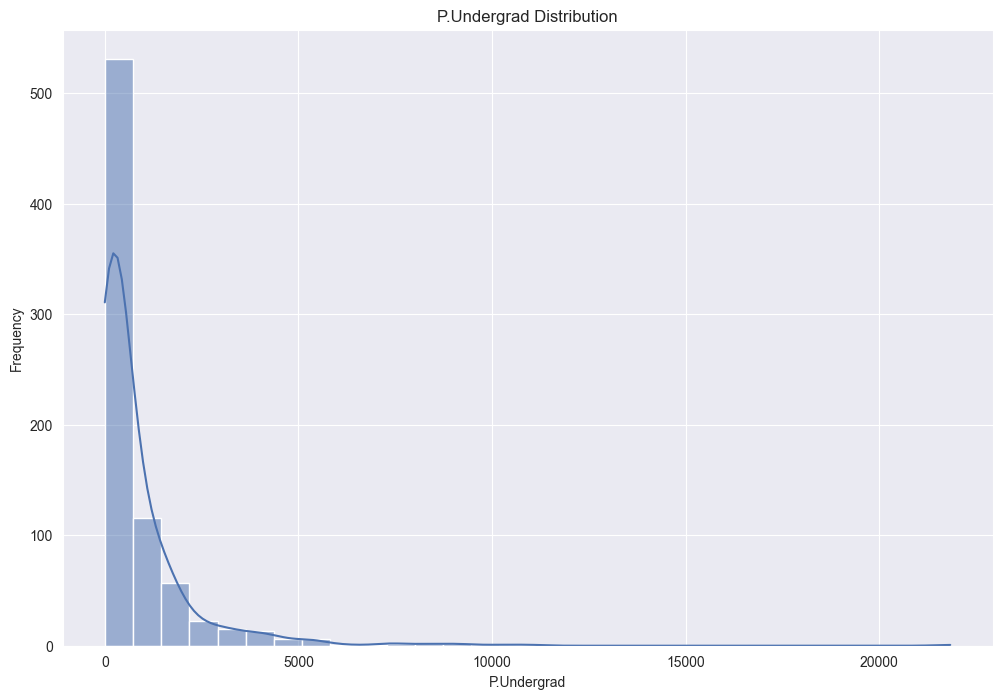

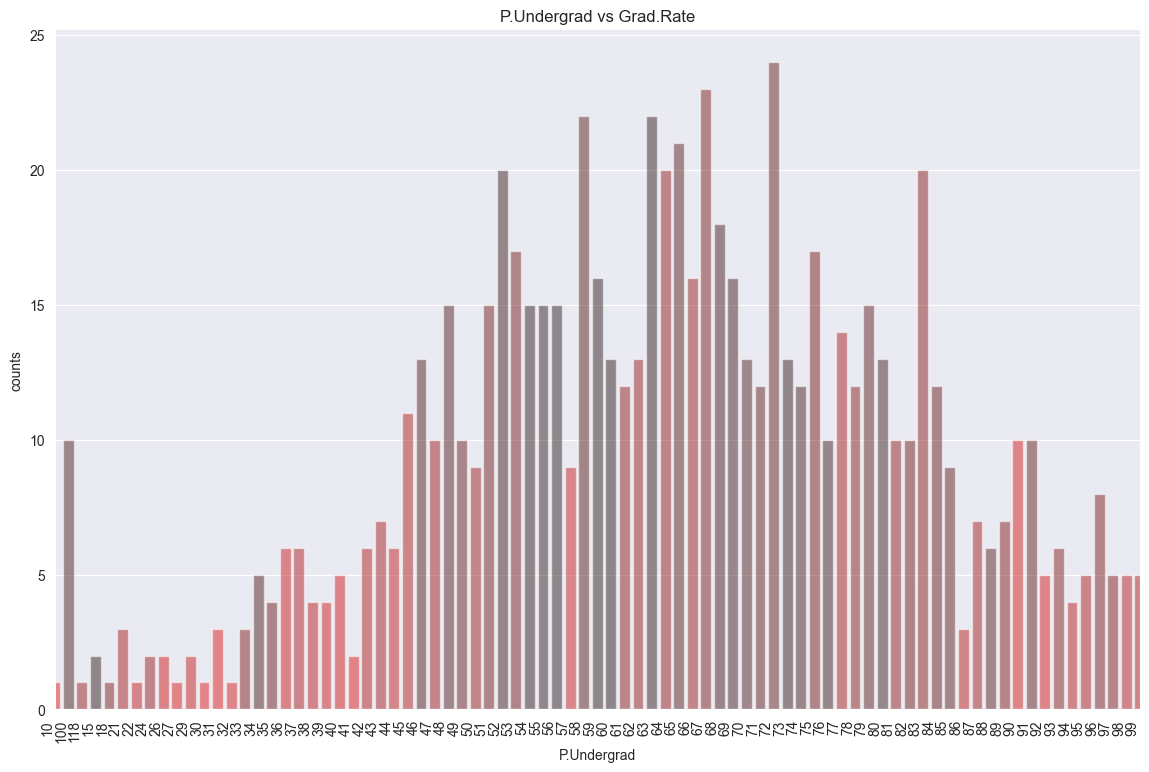

The correlation between Grad.Rate and P.Undergrad is -0.2570009907481127


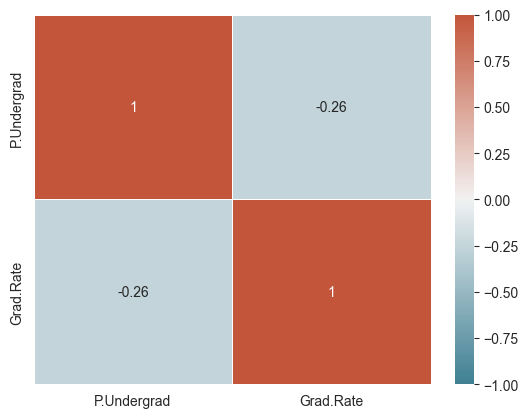

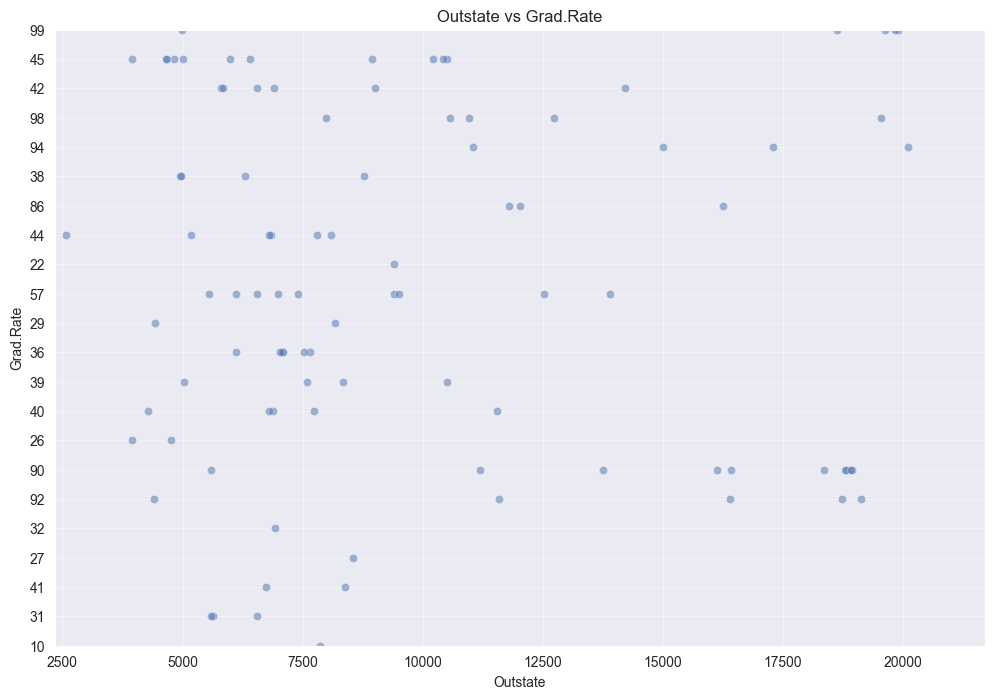

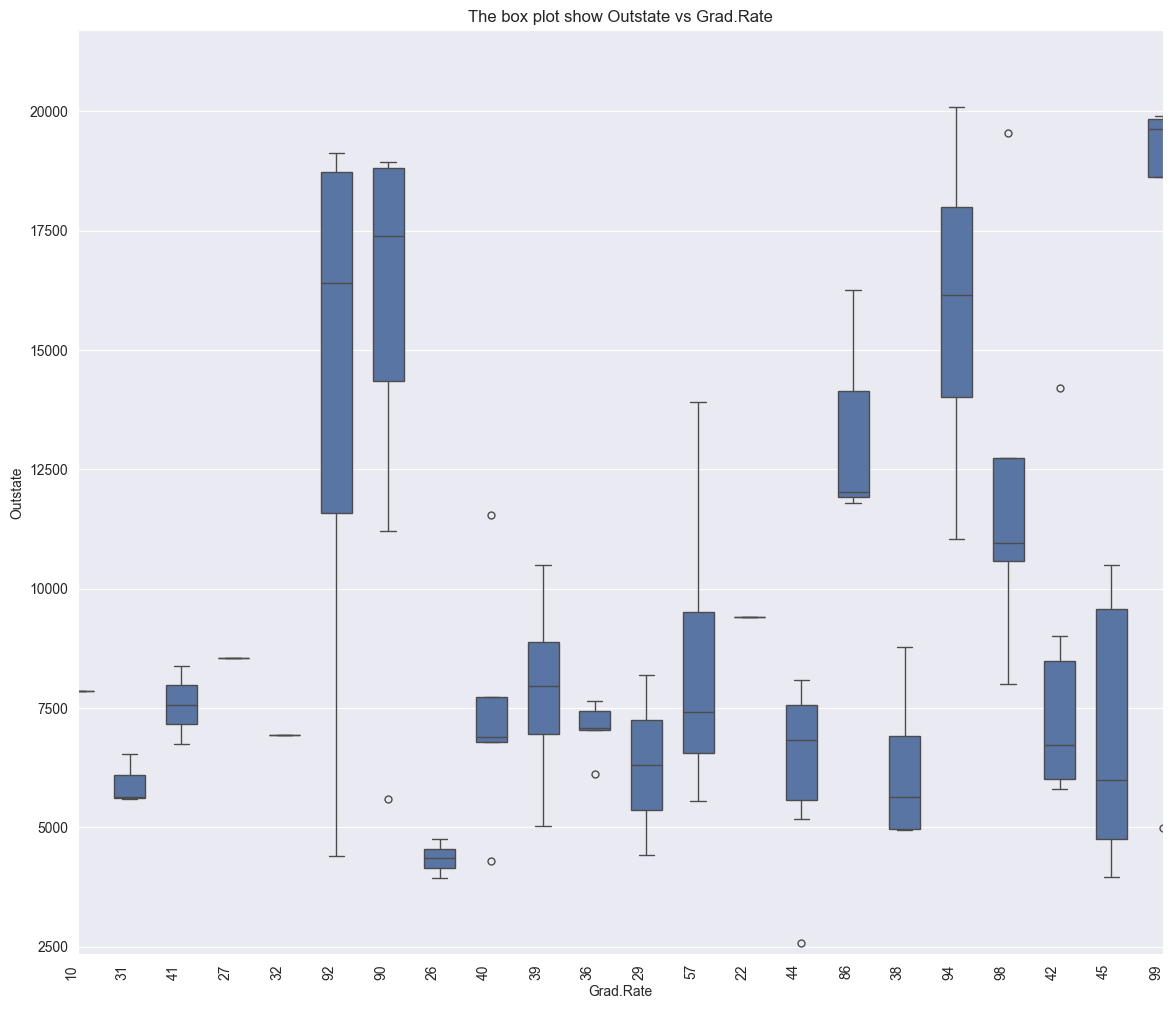

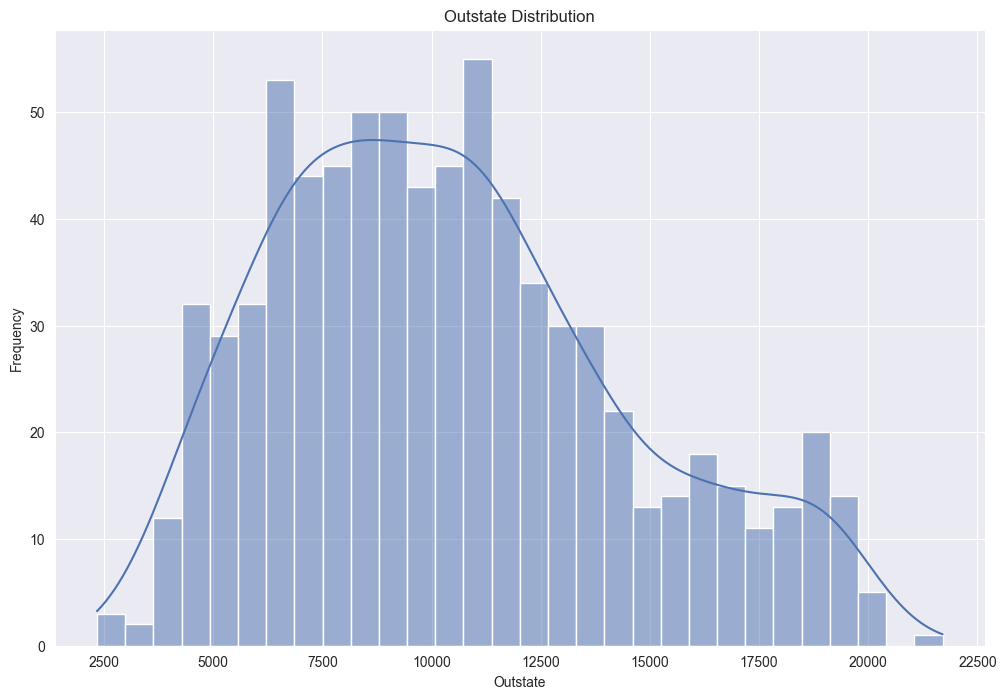

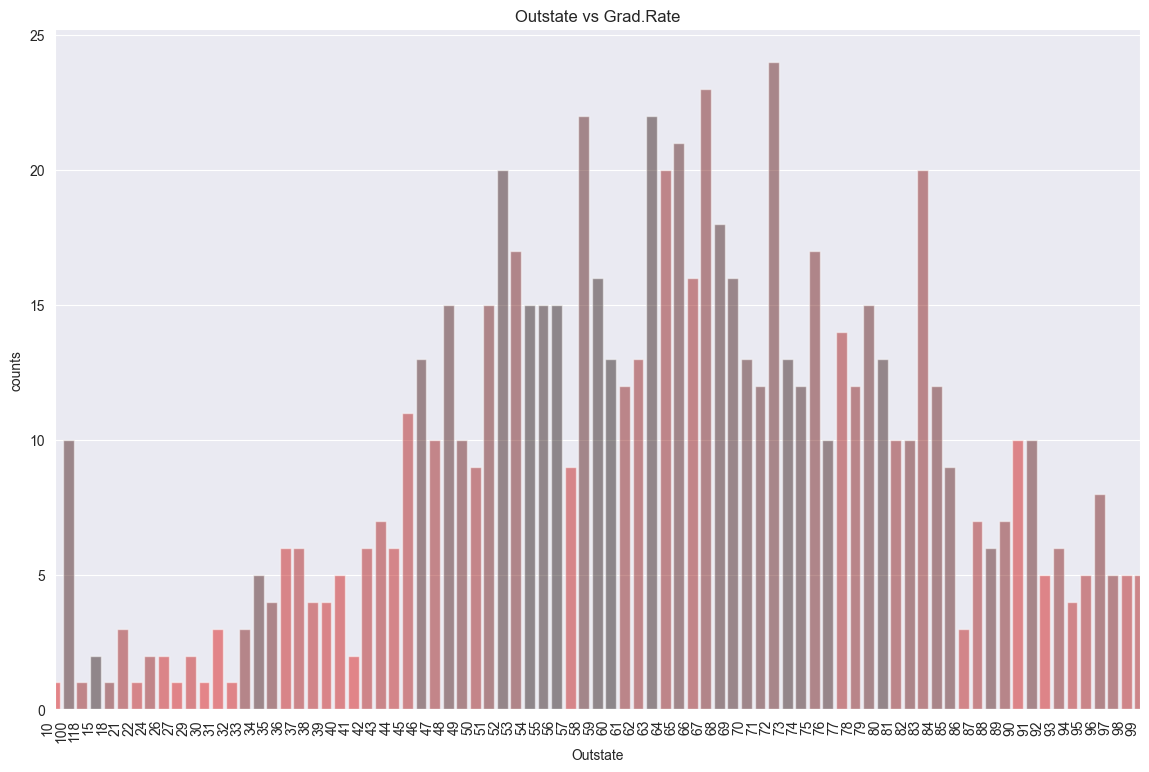

The correlation between Grad.Rate and Outstate is 0.5712899282482006


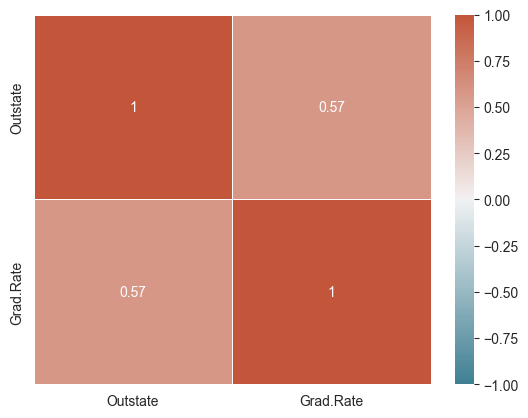

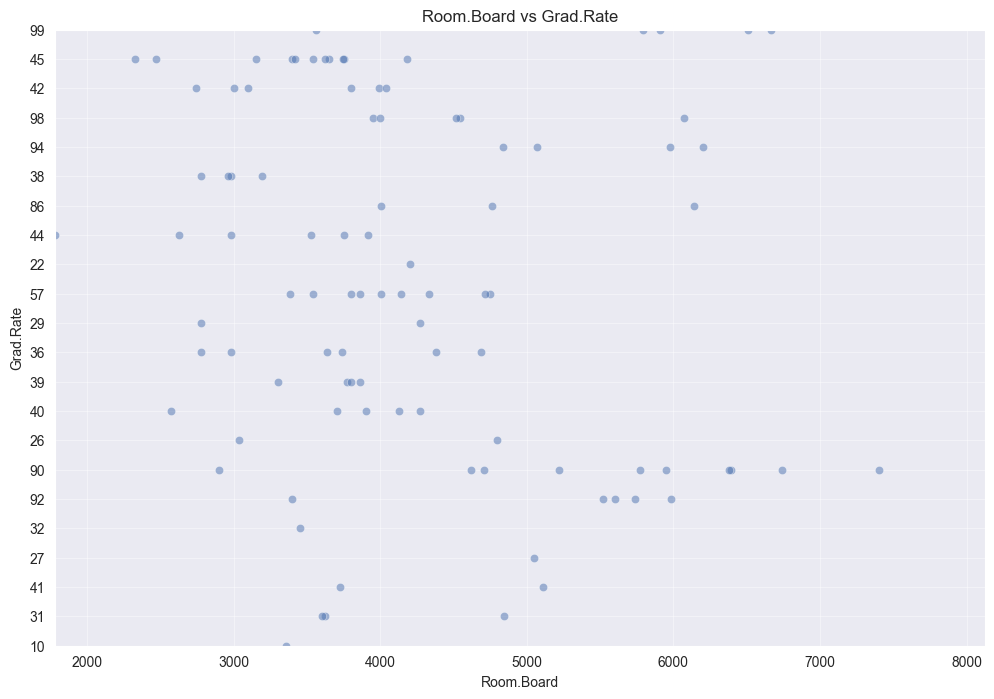

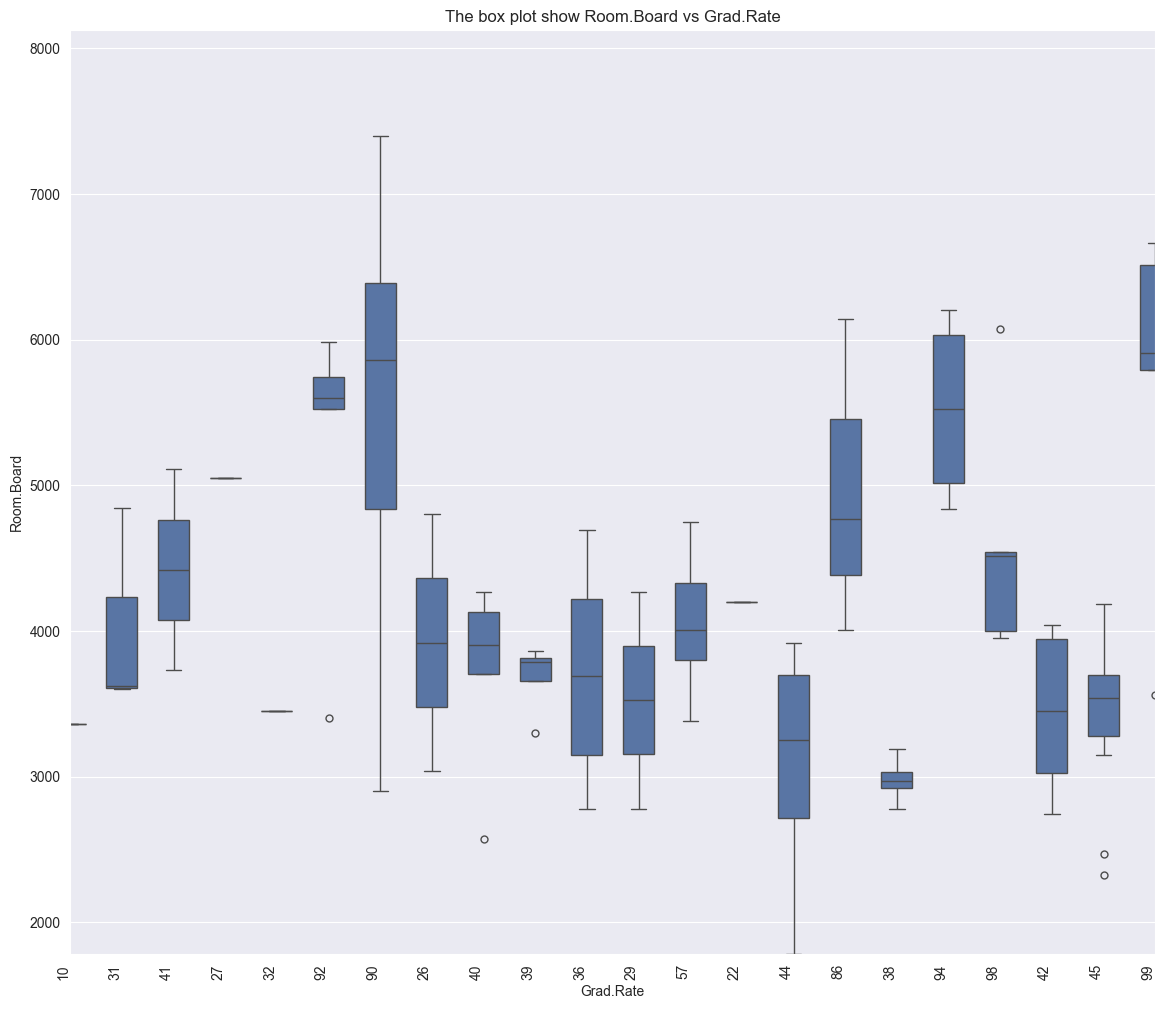

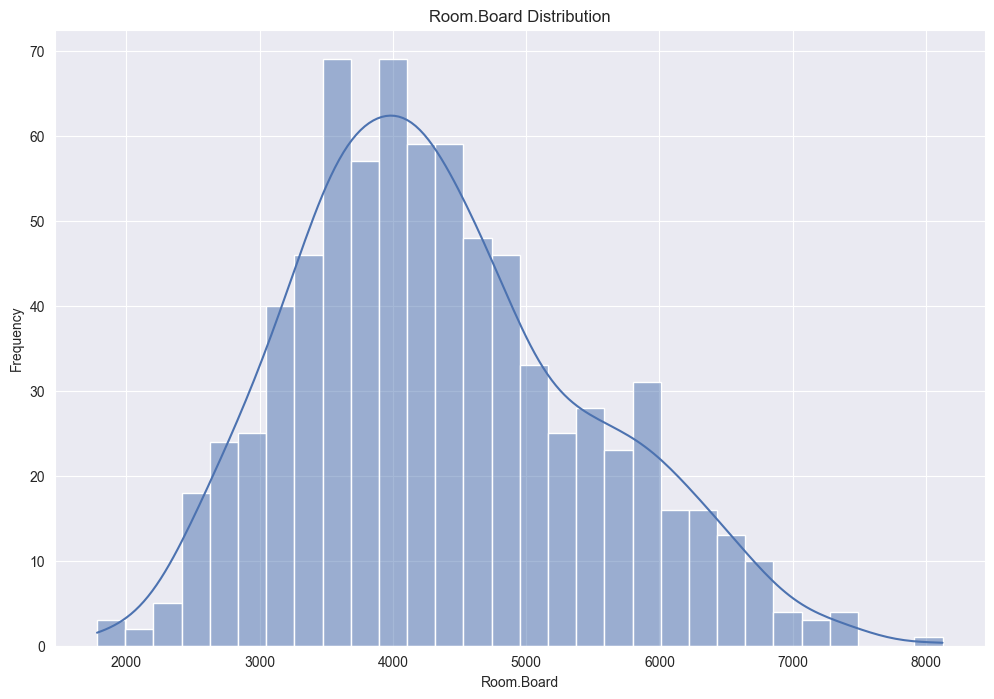

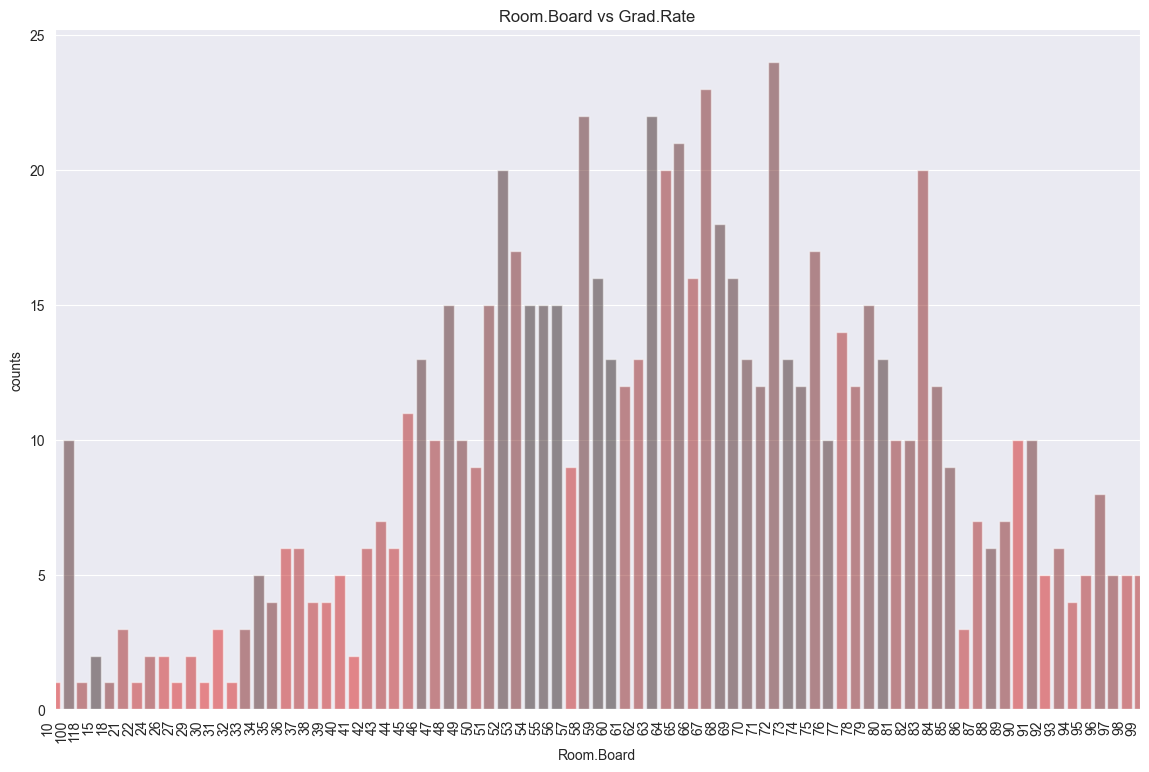

The correlation between Grad.Rate and Room.Board is 0.4249415412999612


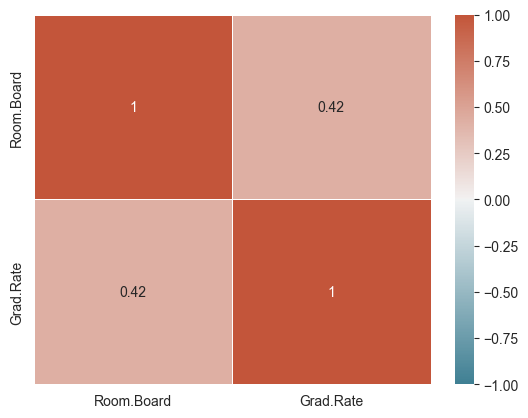

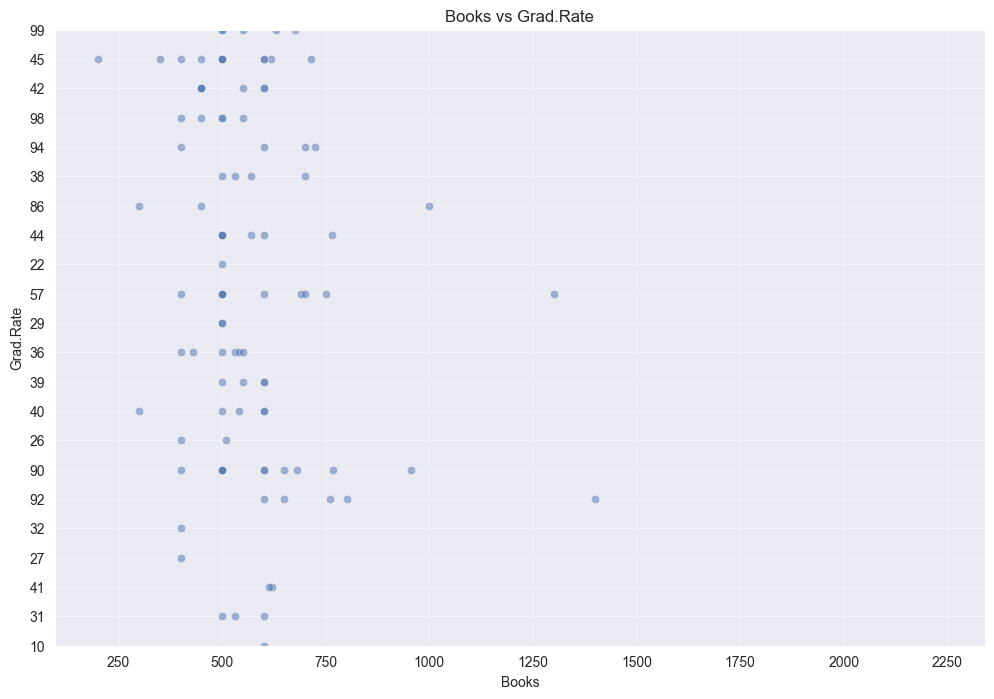

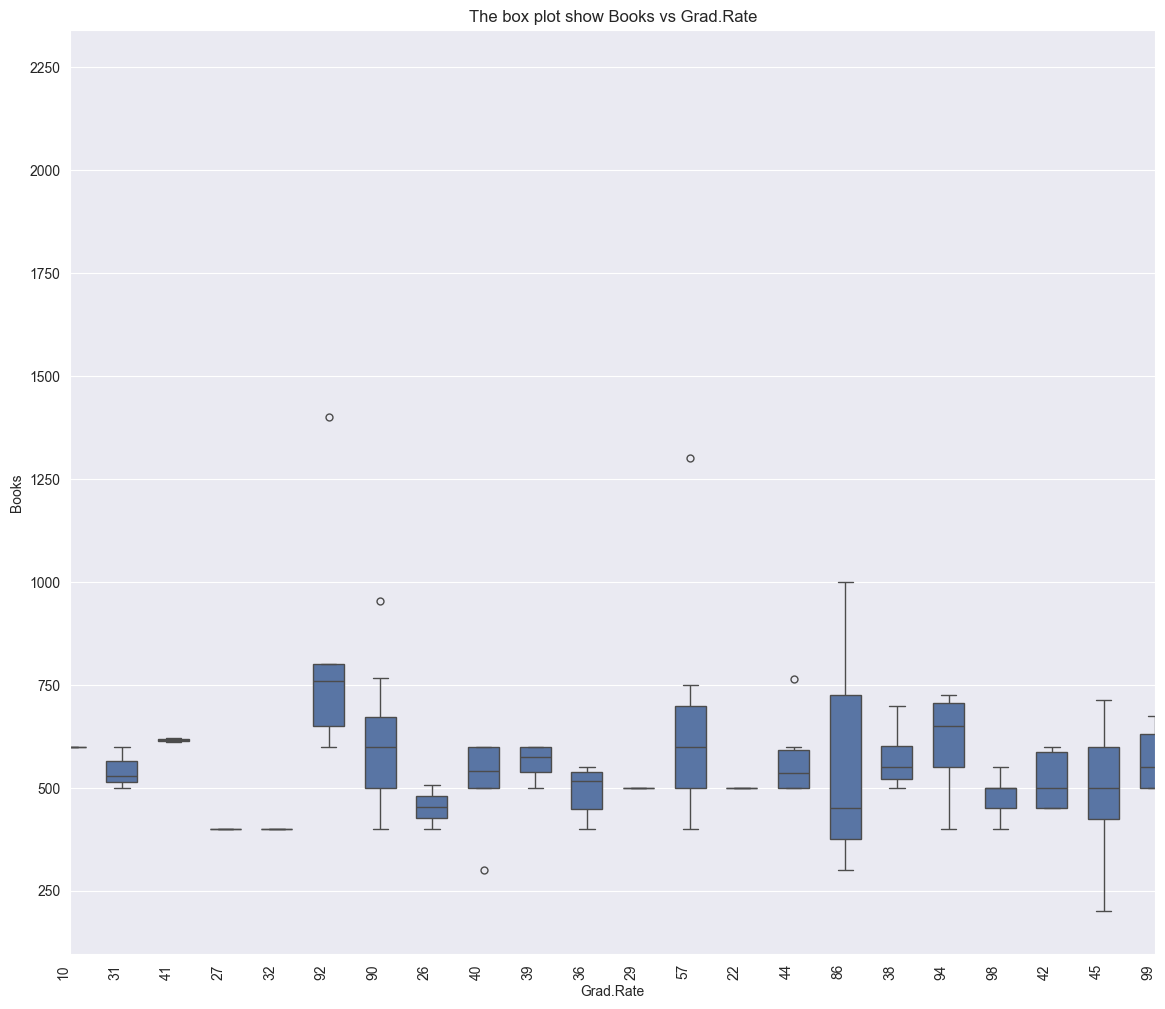

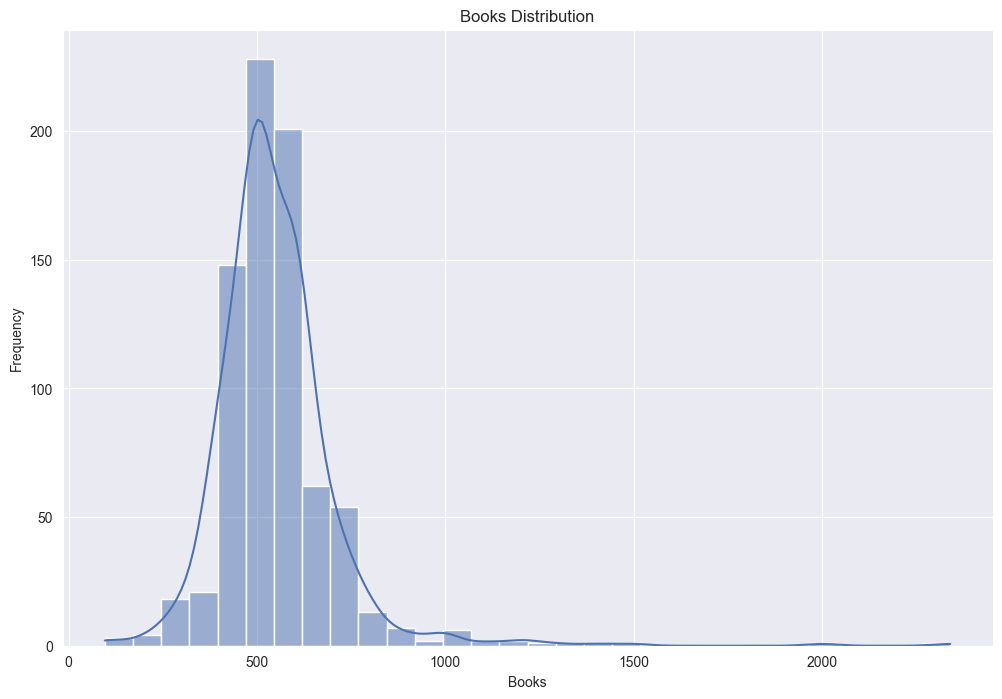

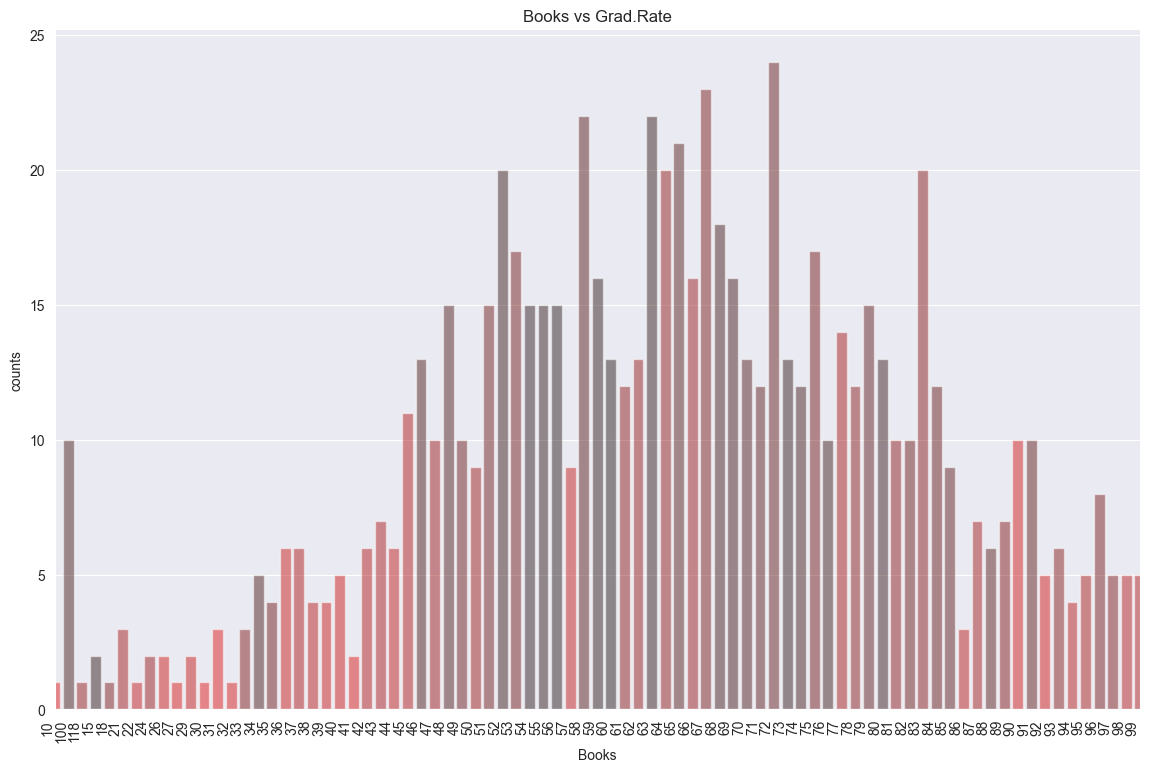

The correlation between Grad.Rate and Books is 0.0010608943965532537


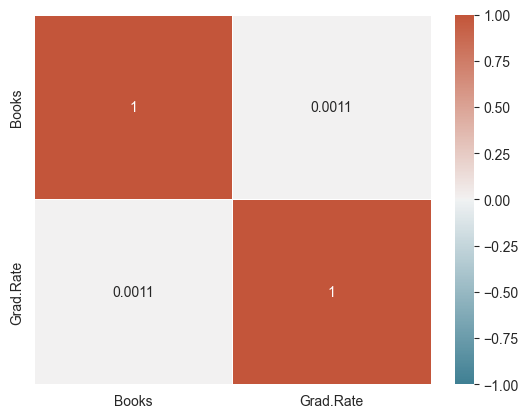

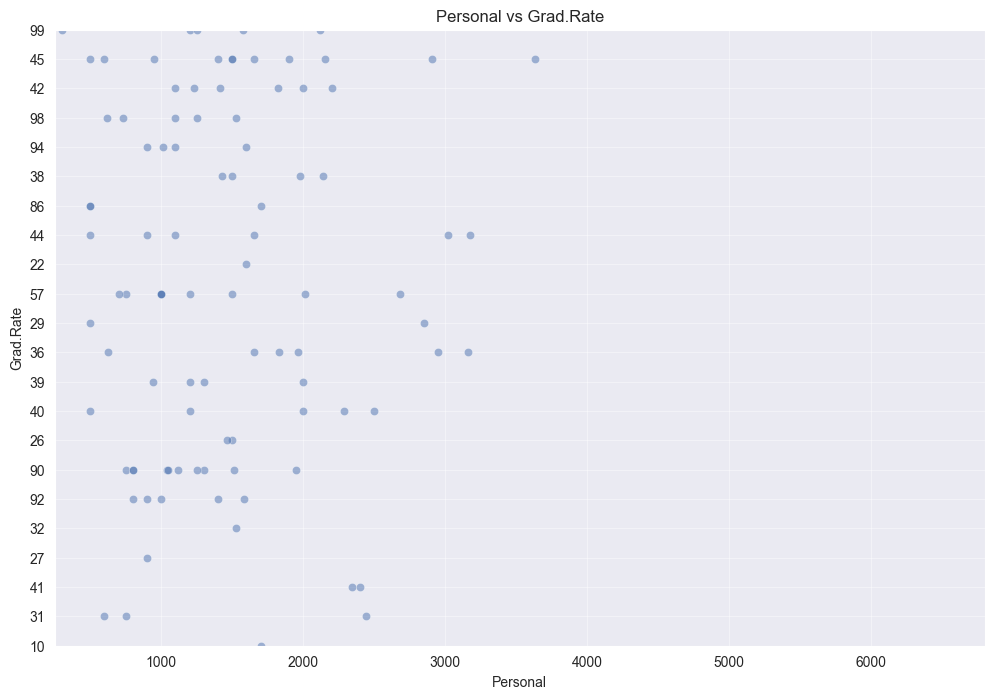

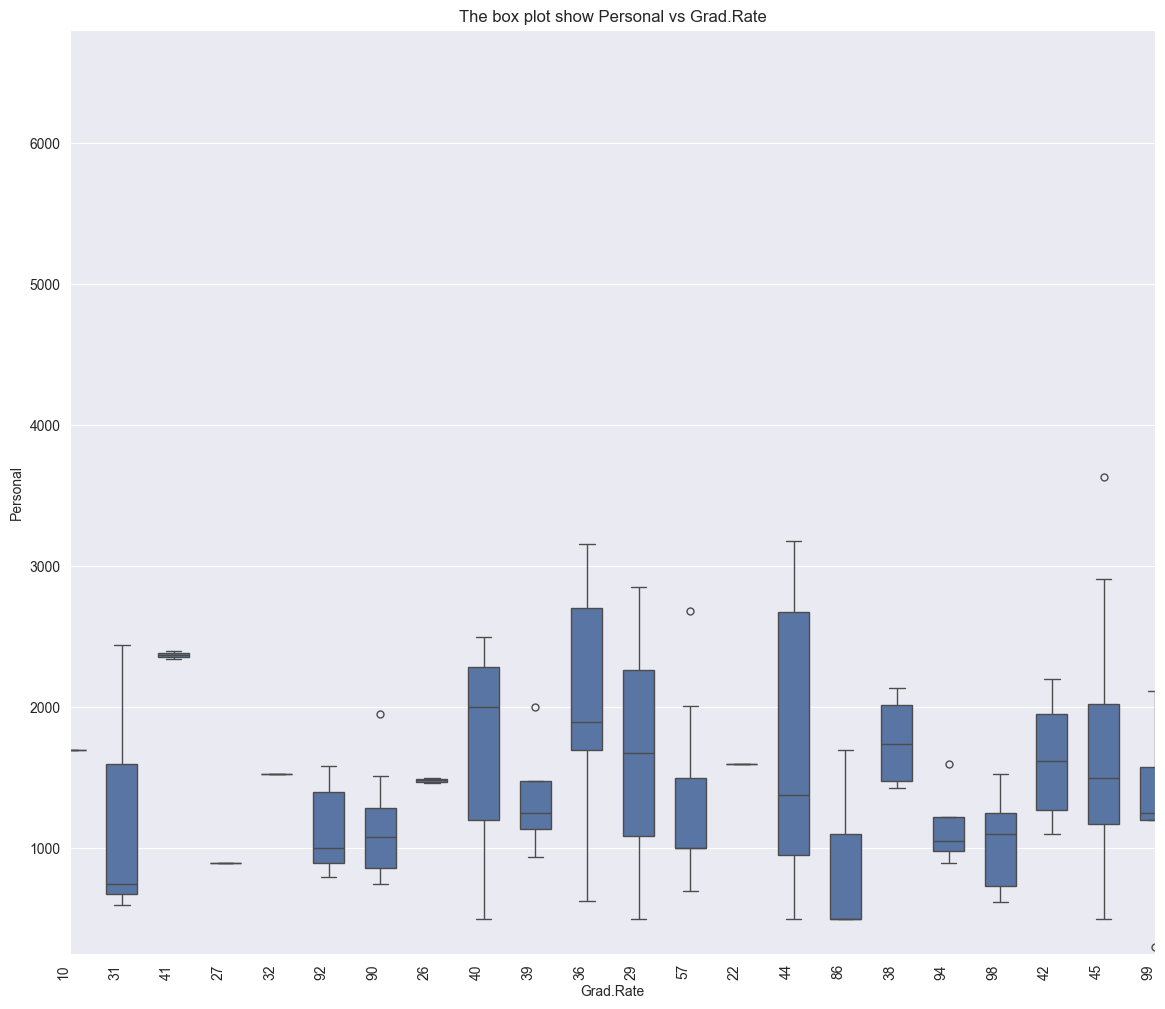

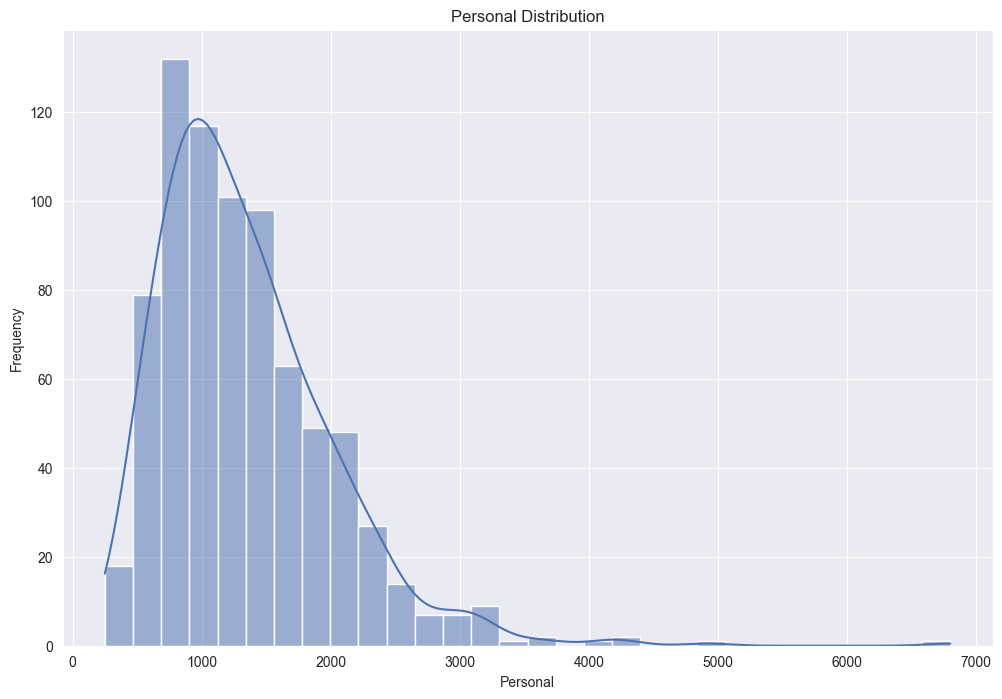

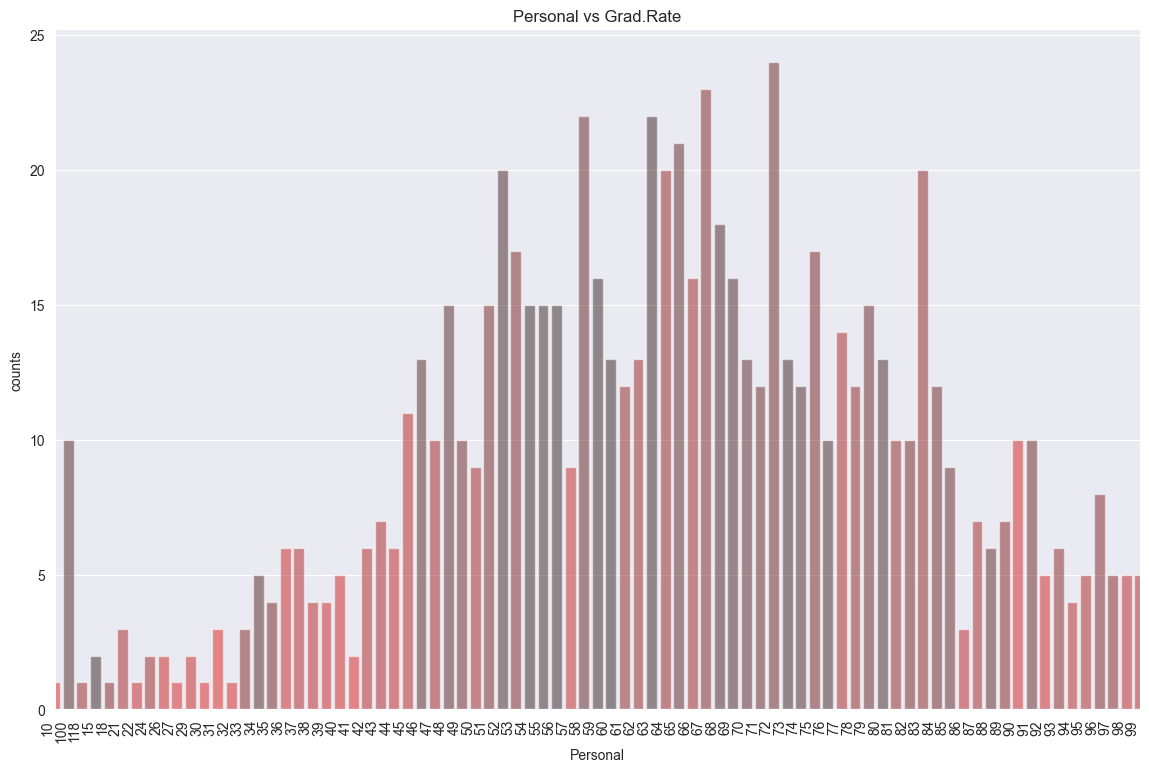

The correlation between Grad.Rate and Personal is -0.269343964249873


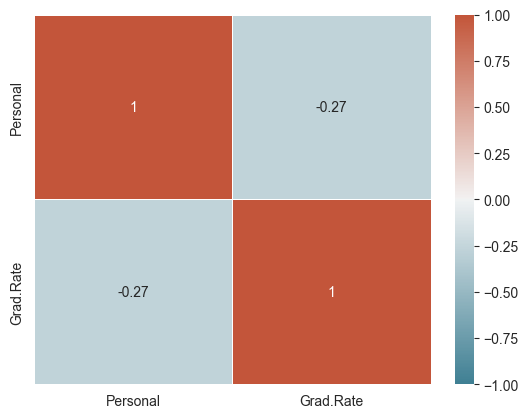

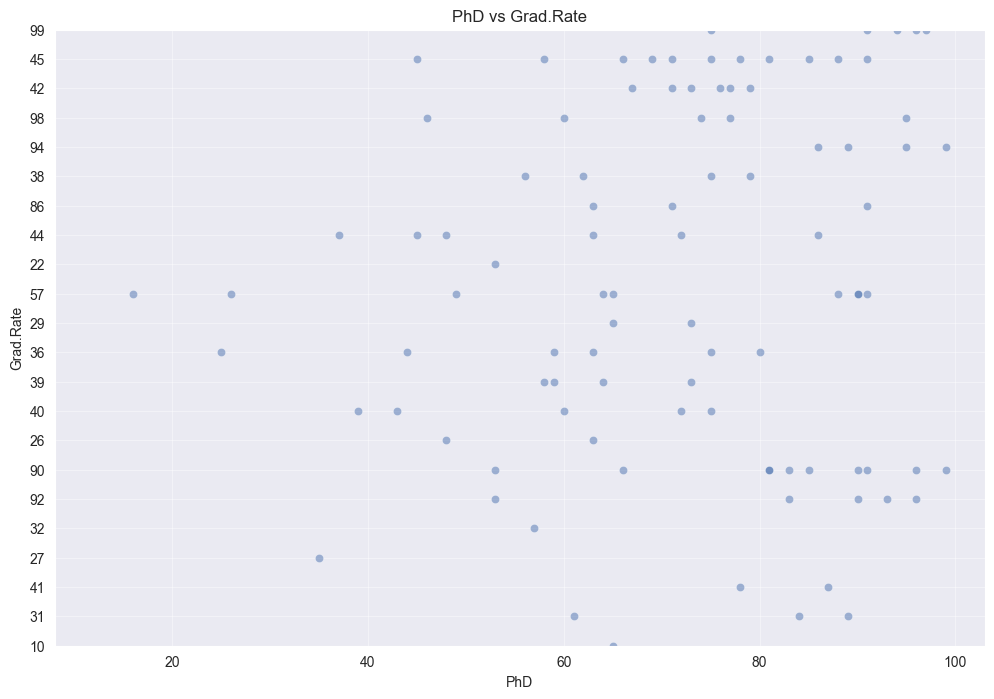

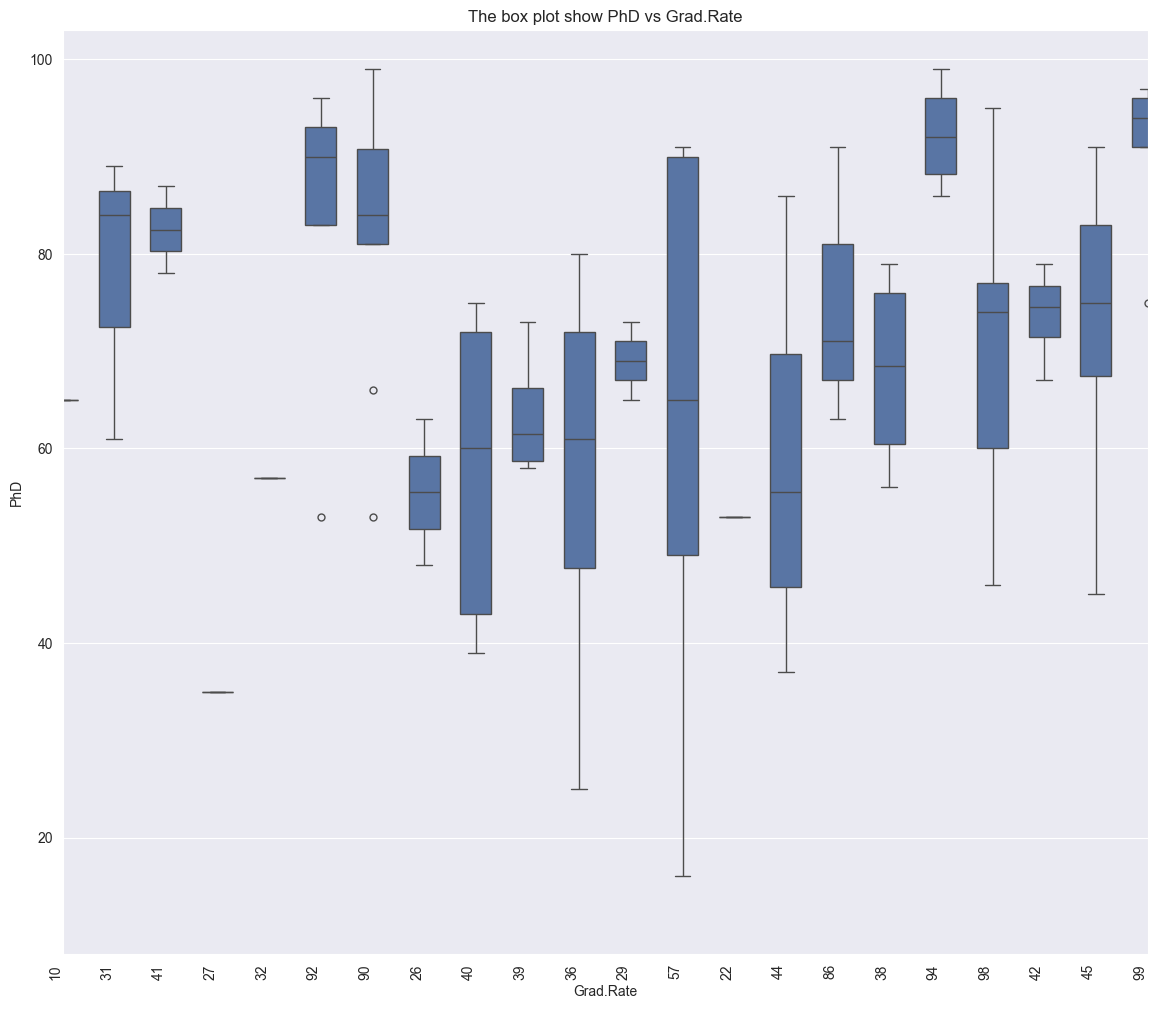

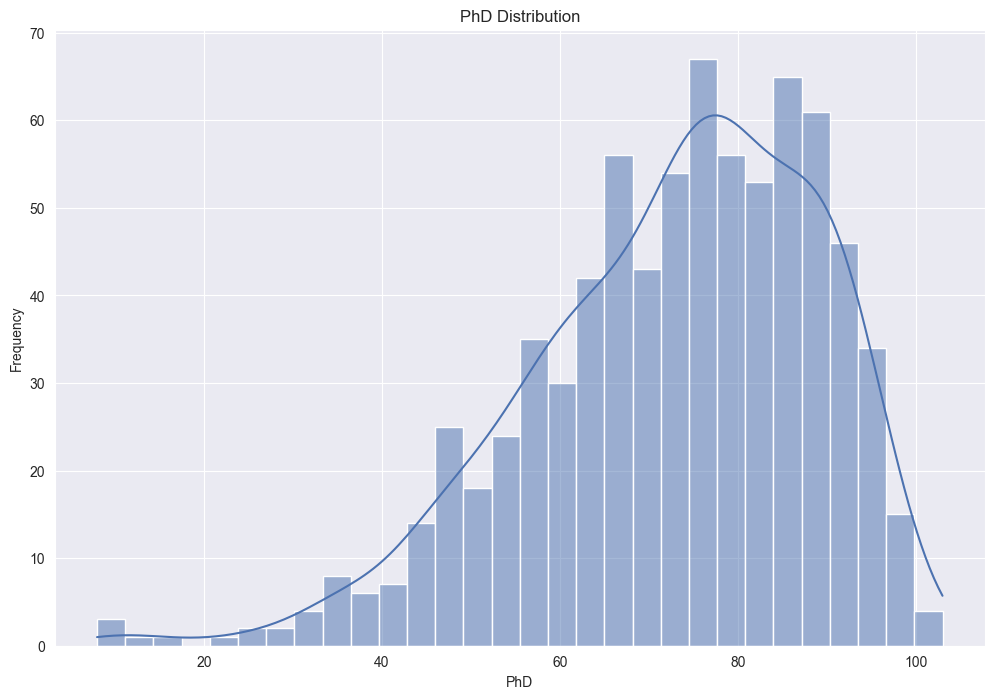

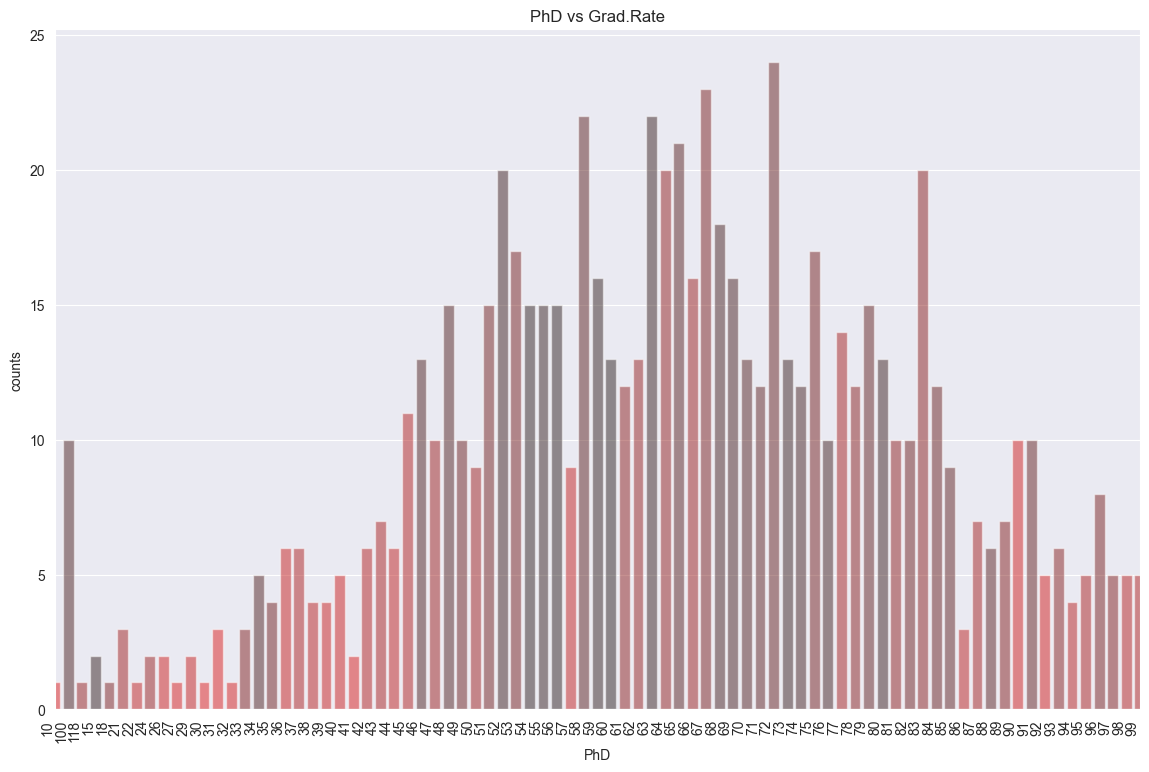

The correlation between Grad.Rate and PhD is 0.3050378500234123


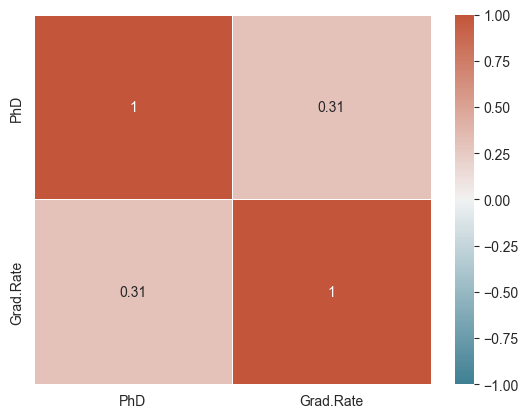

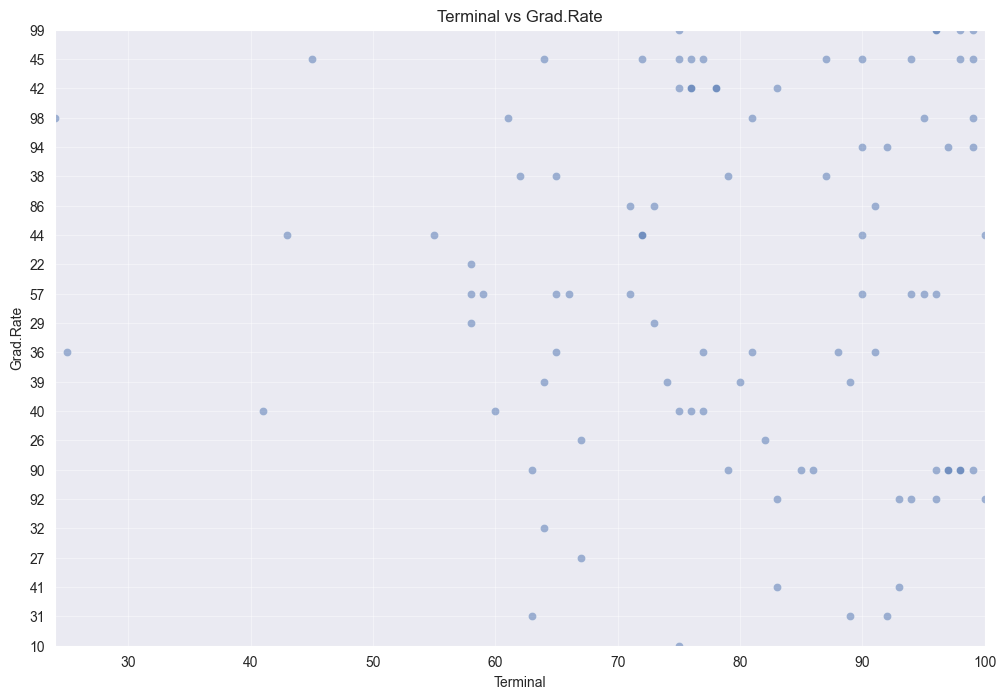

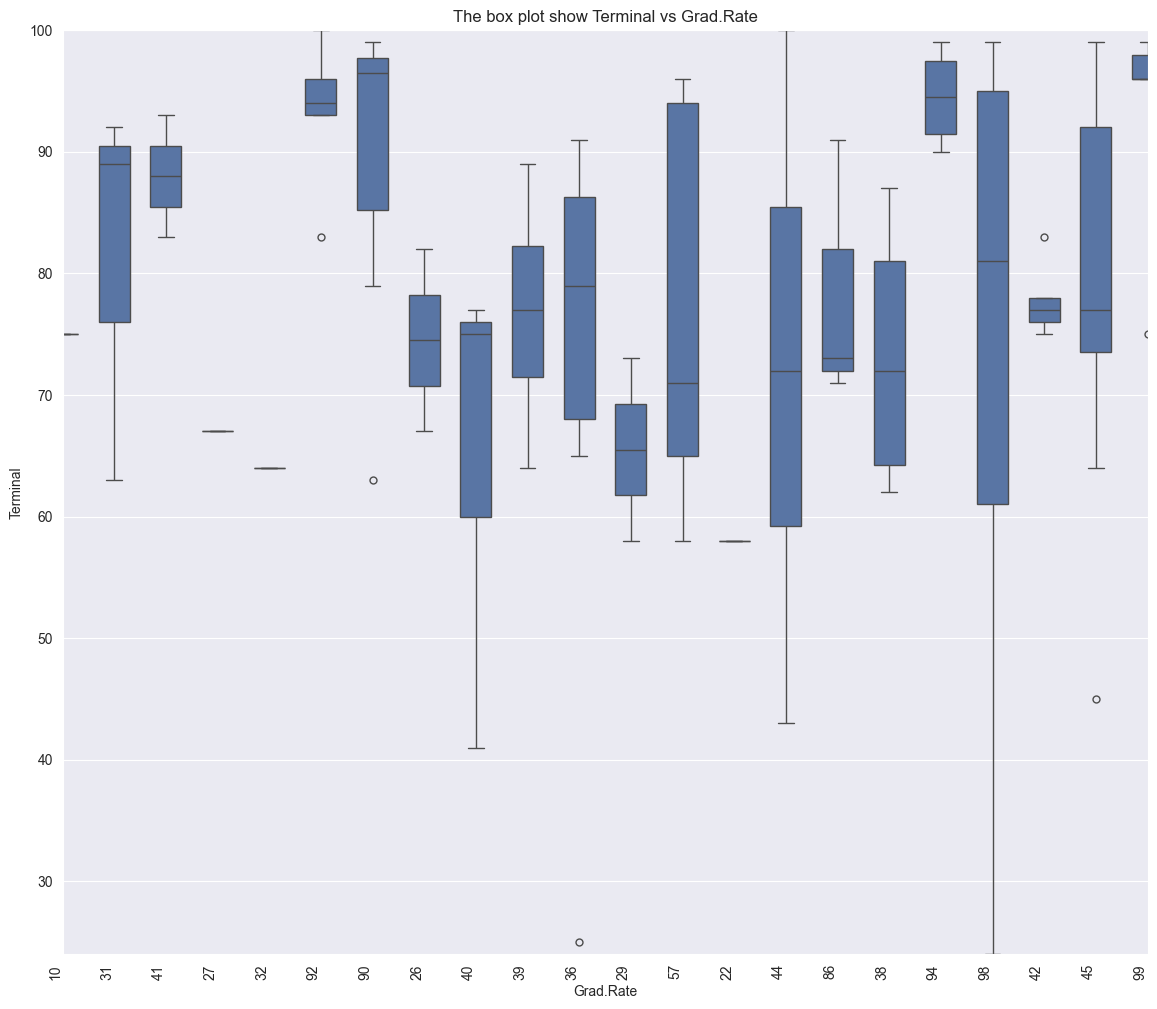

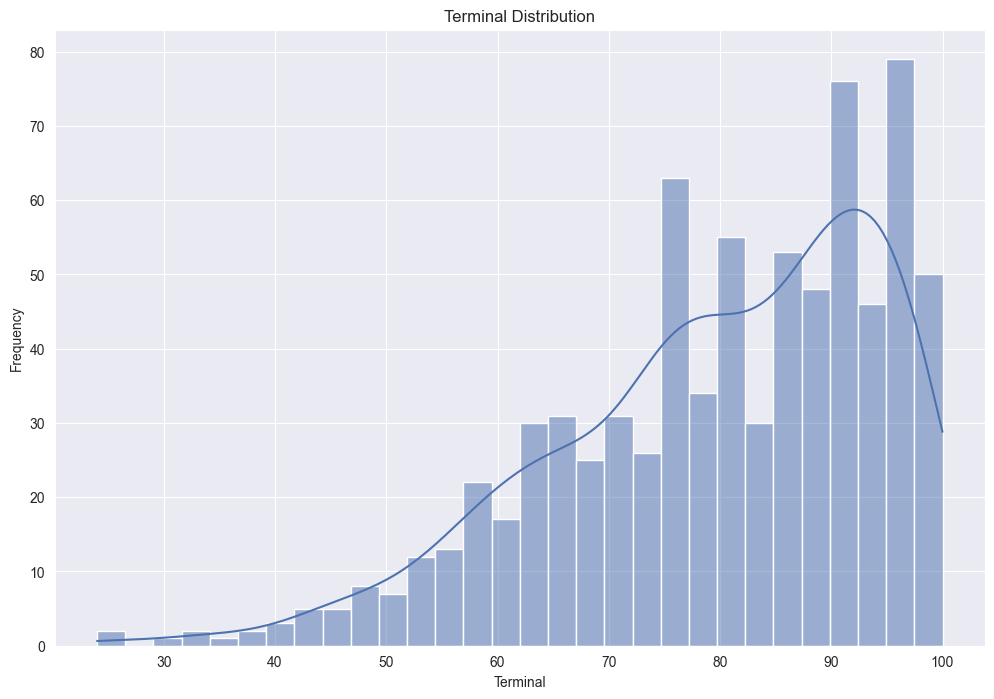

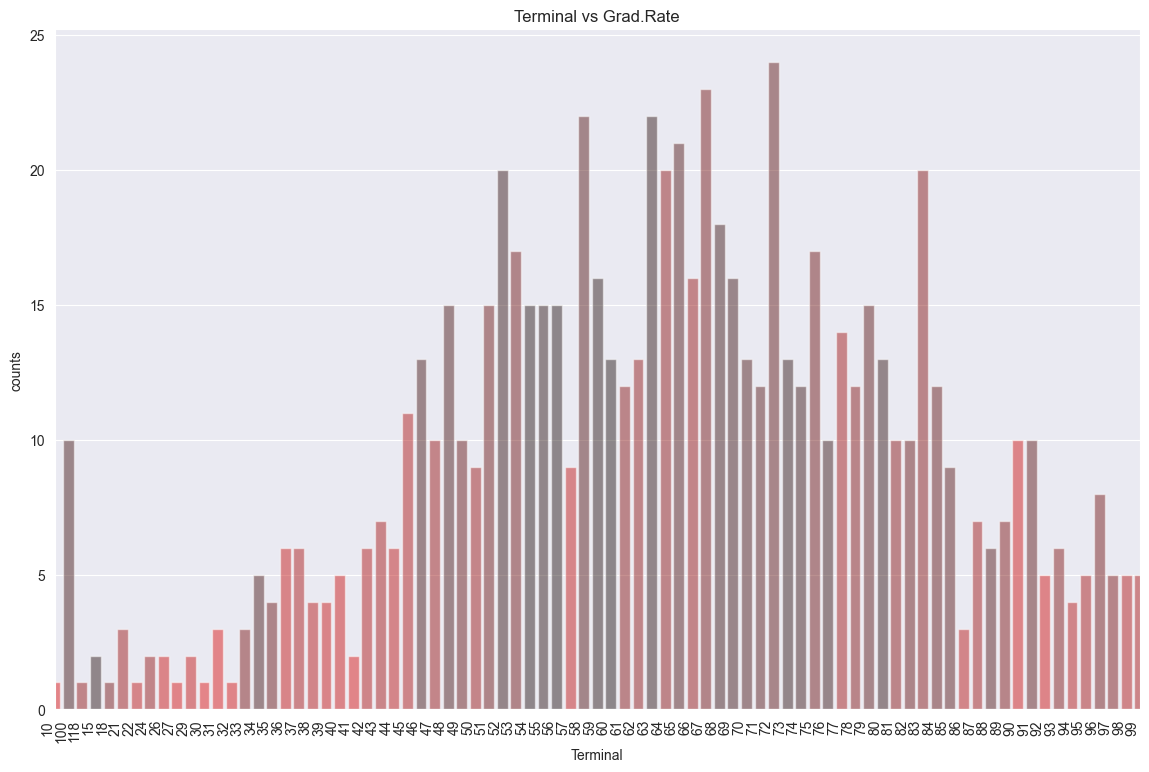

The correlation between Grad.Rate and Terminal is 0.28952723152583704


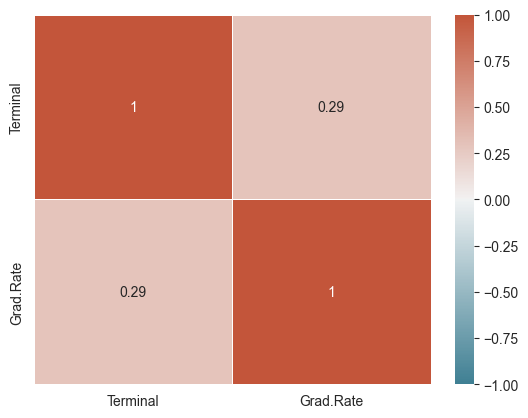

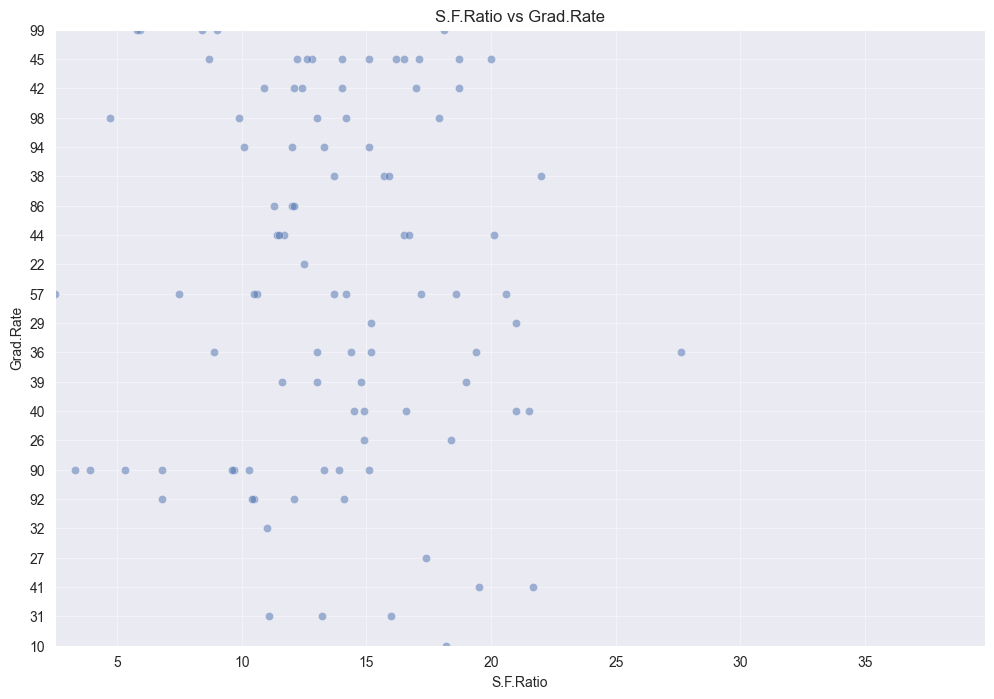

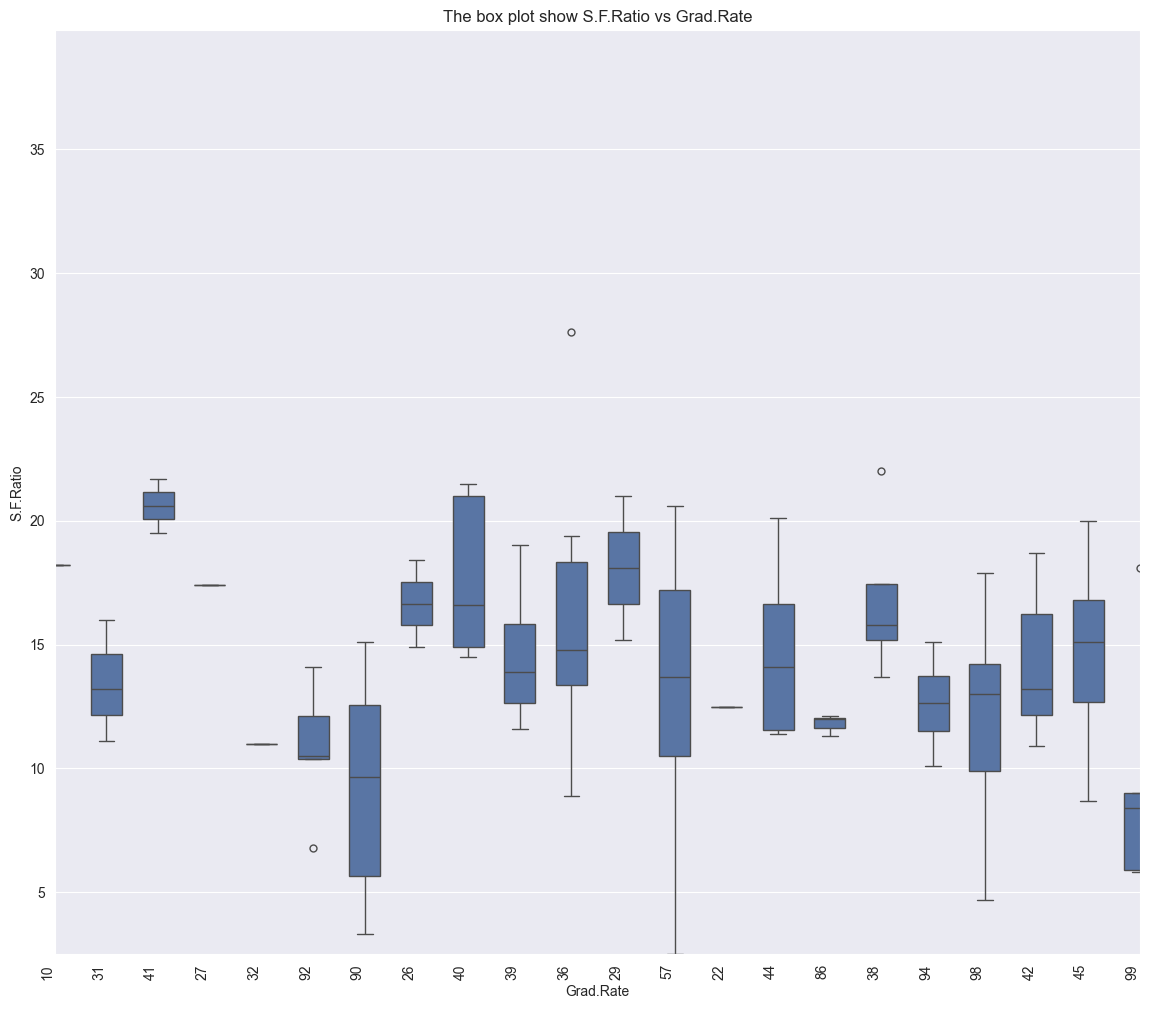

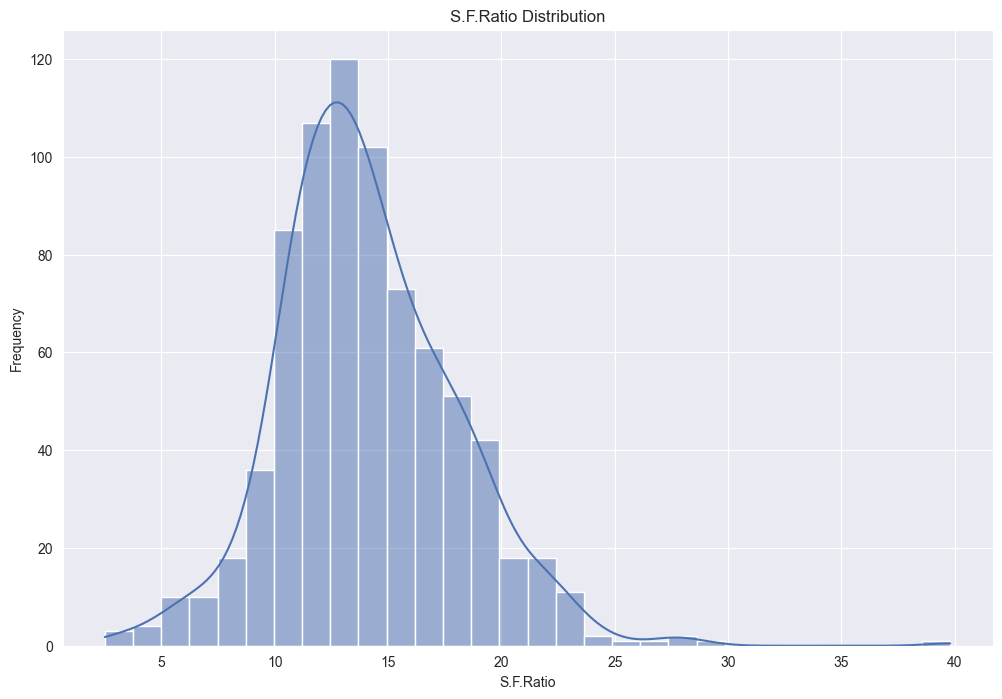

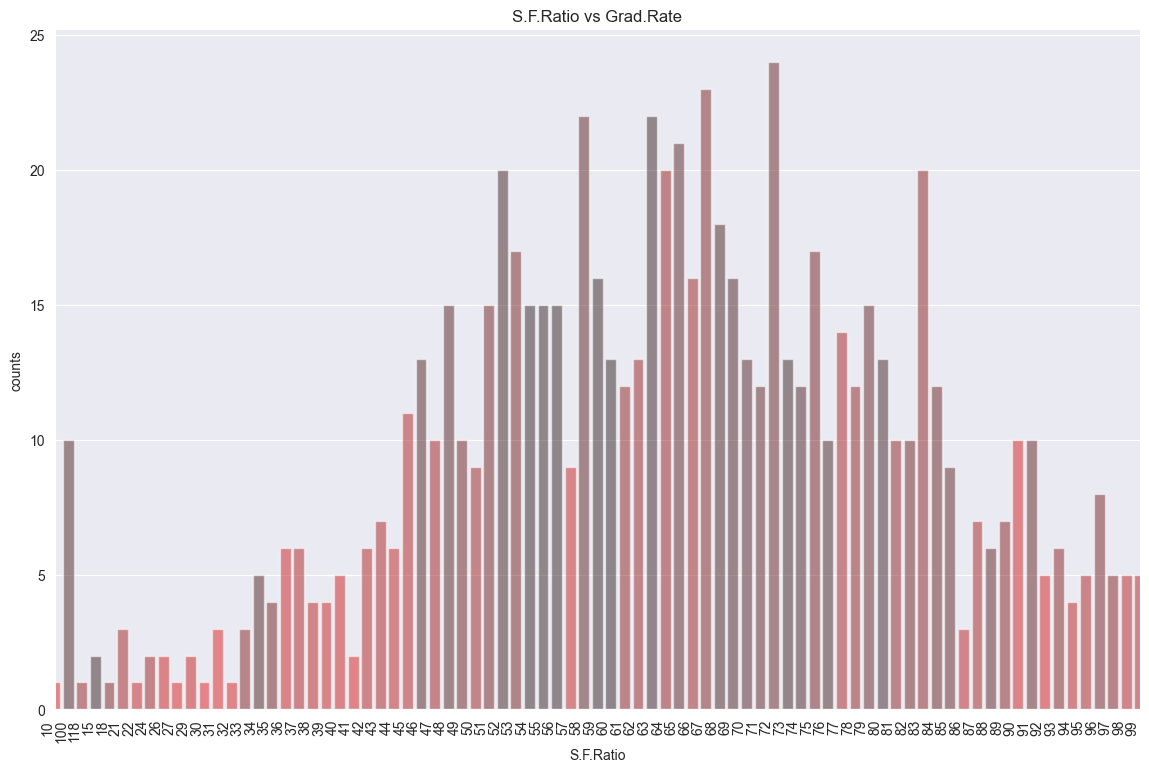

The correlation between Grad.Rate and S.F.Ratio is -0.3067104053269456


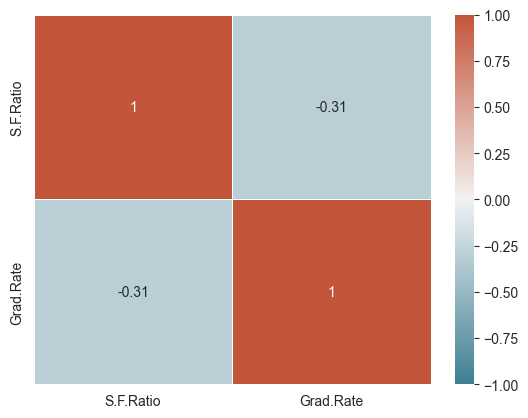

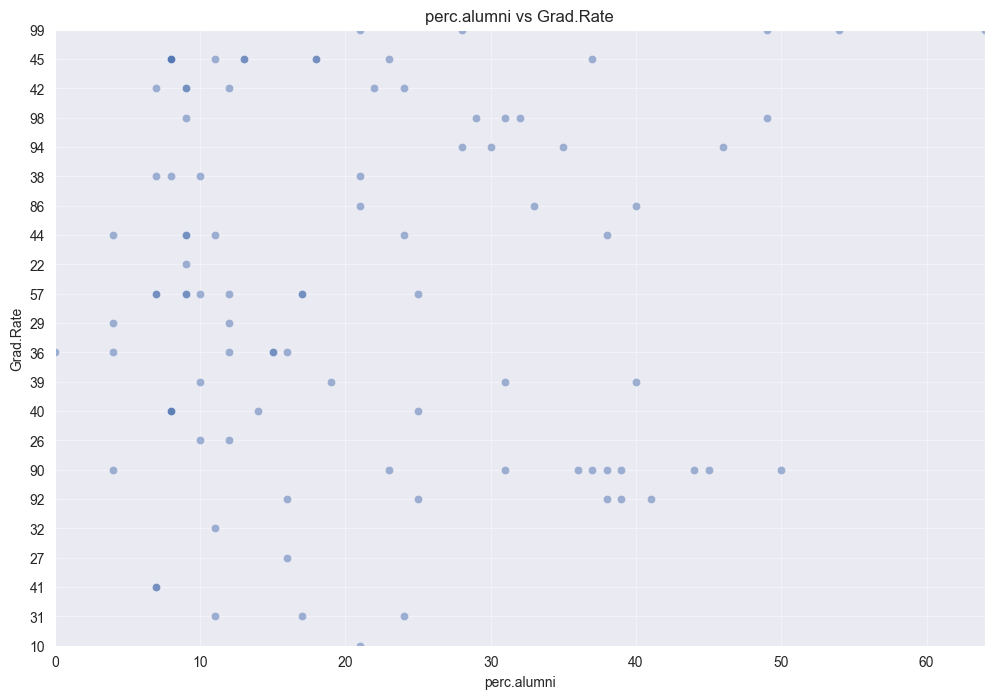

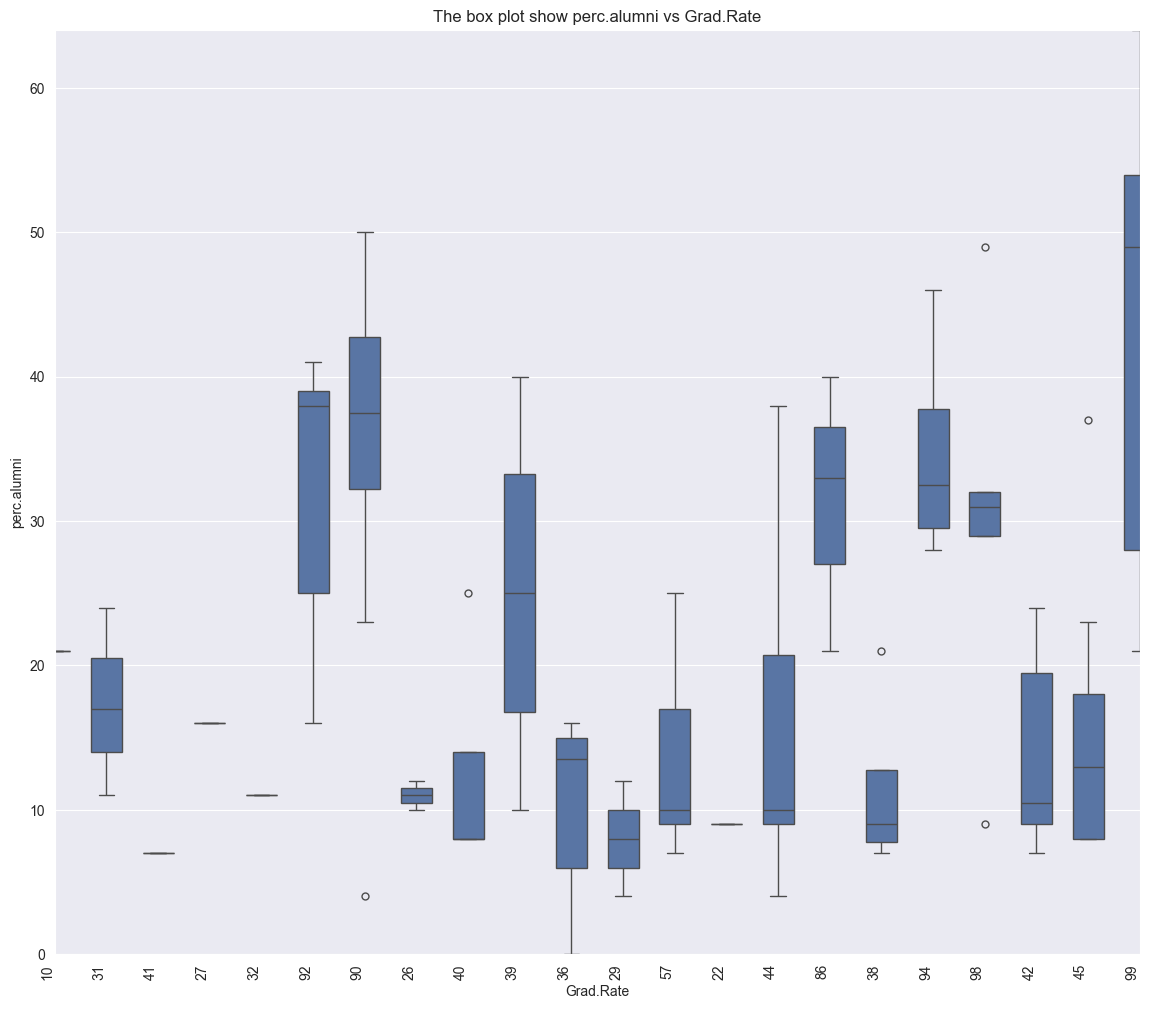

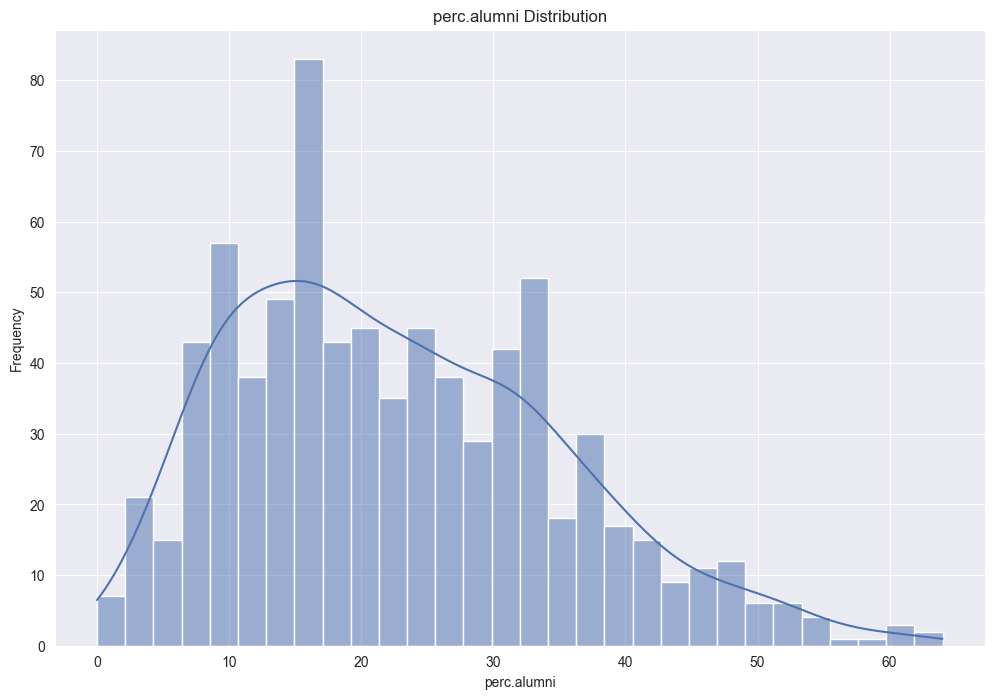

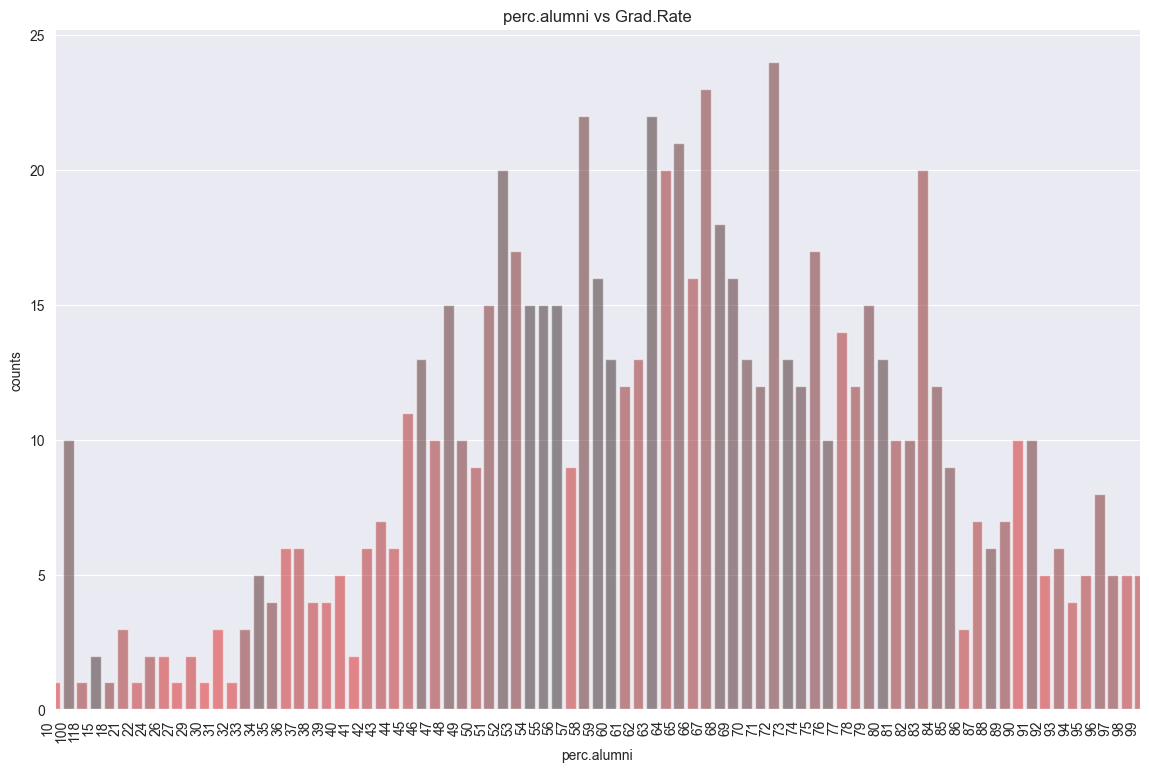

The correlation between Grad.Rate and perc.alumni is 0.49089756228472126


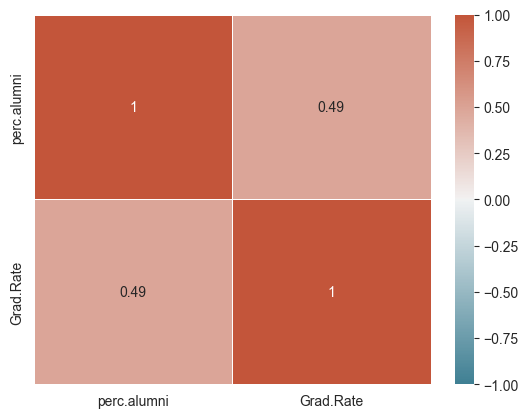

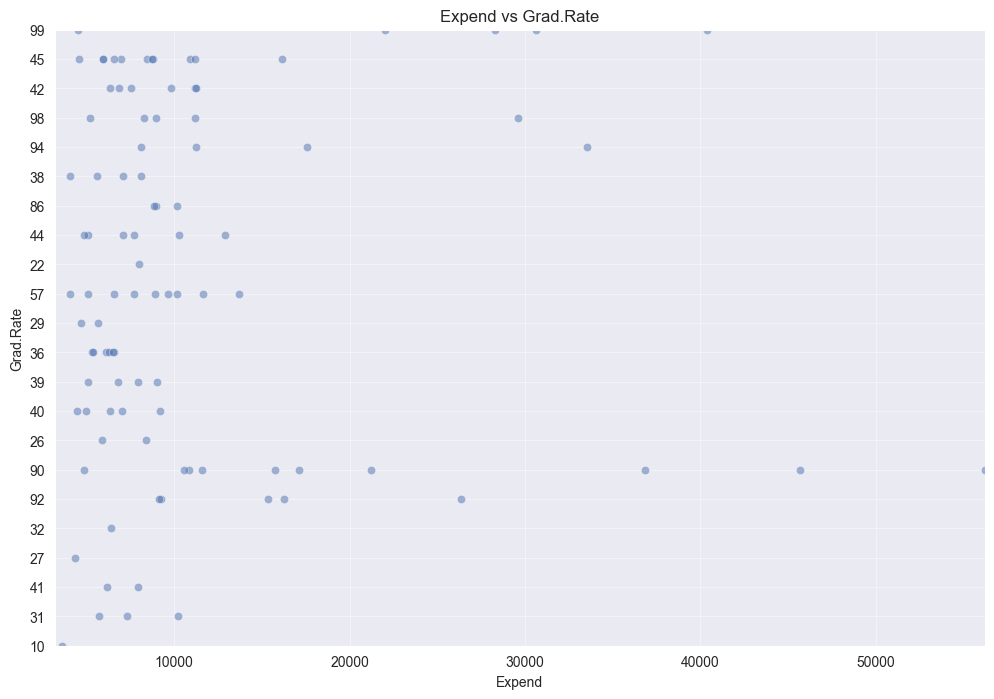

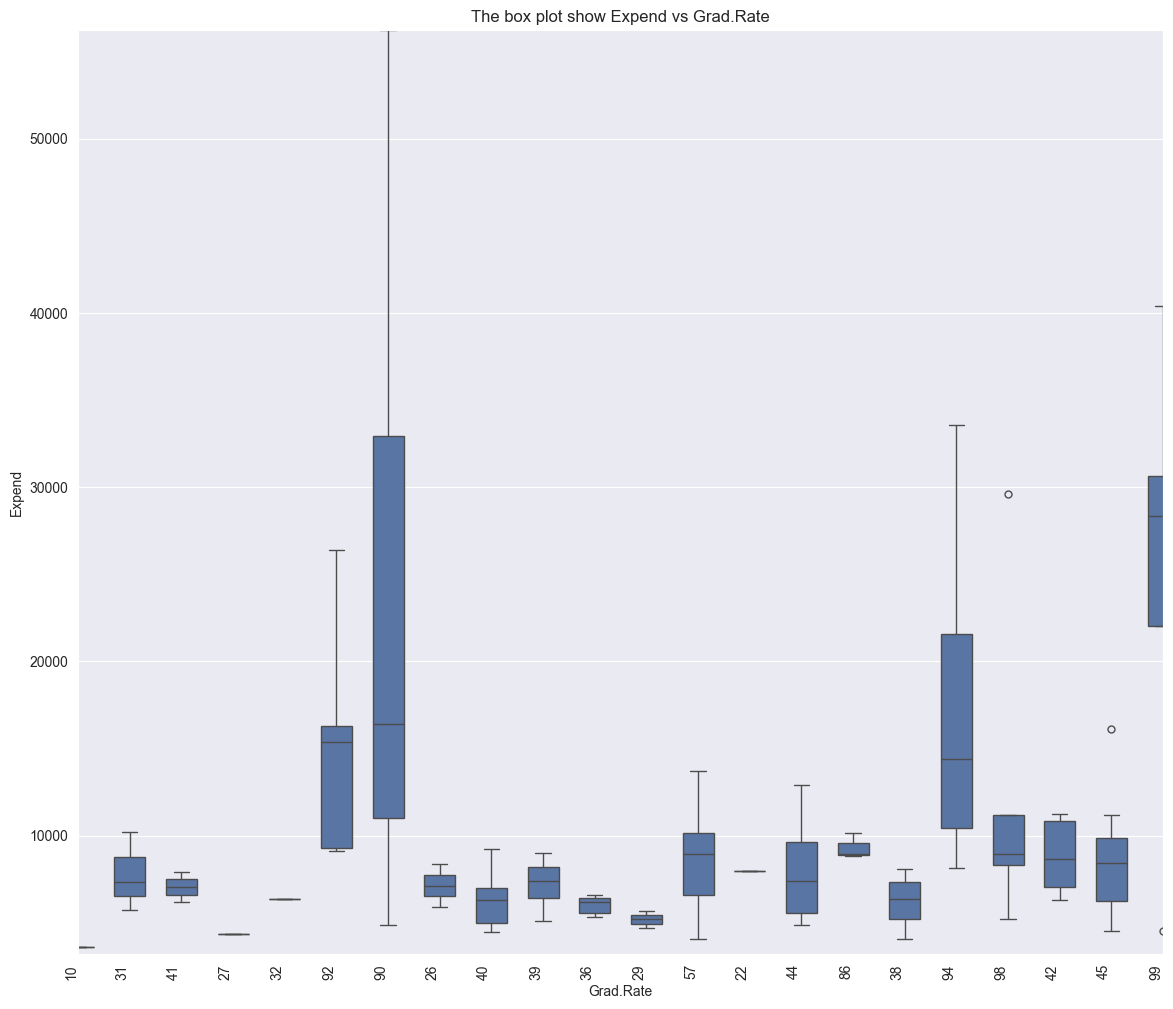

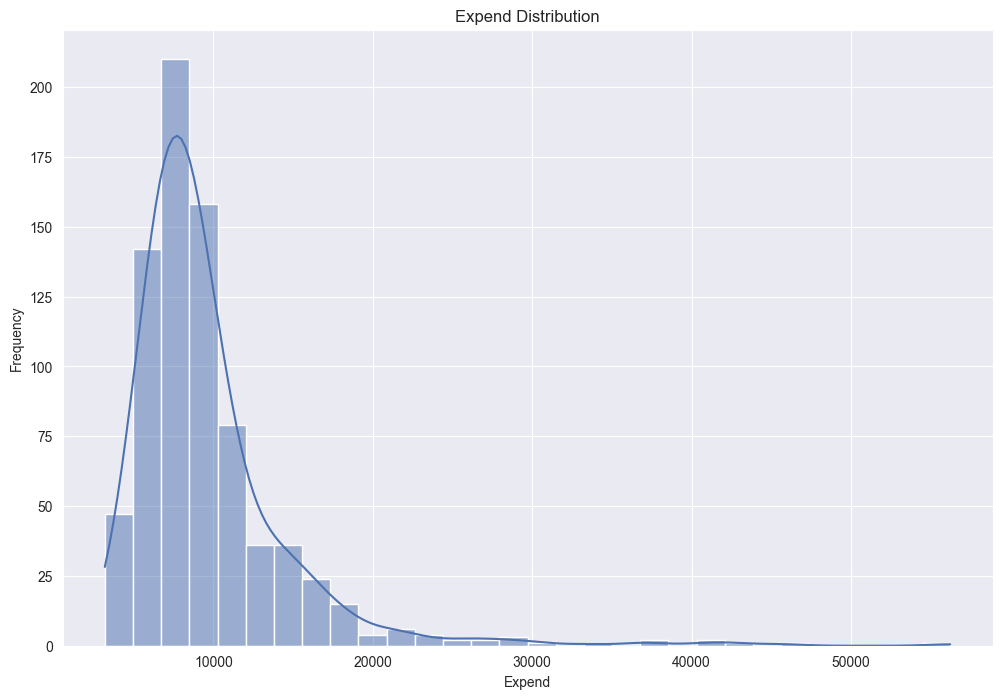

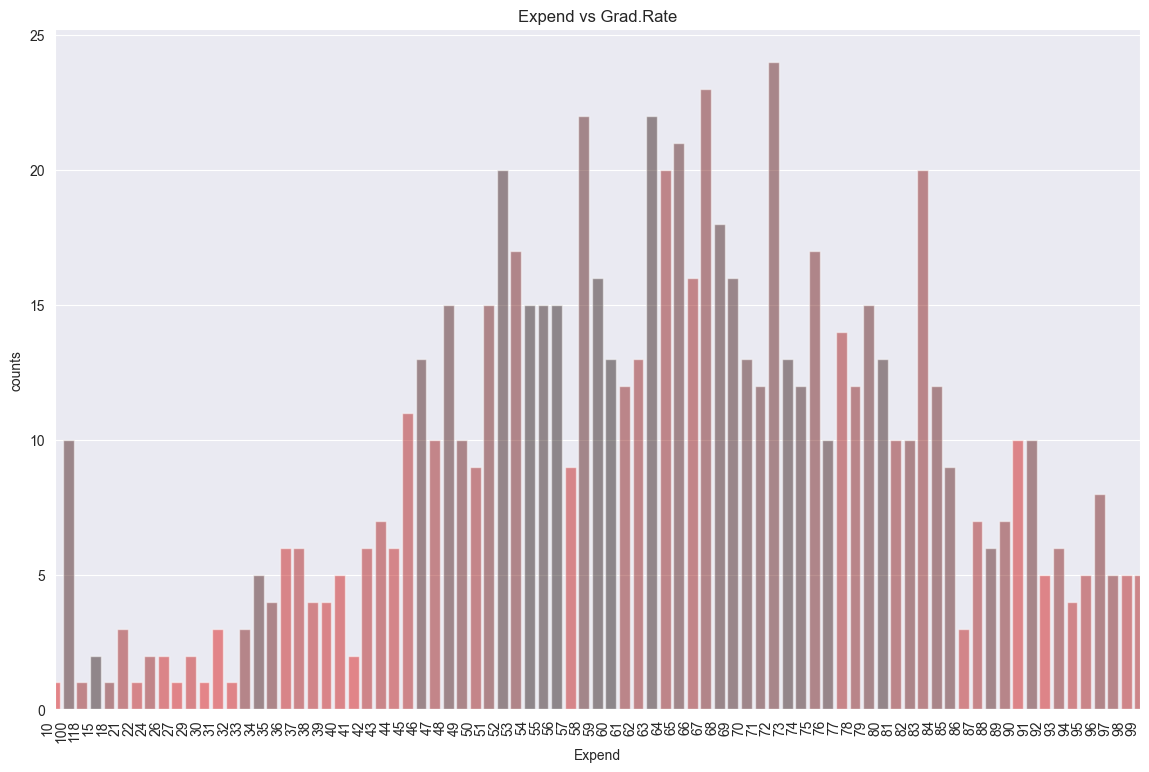

The correlation between Grad.Rate and Expend is 0.3903426958593891


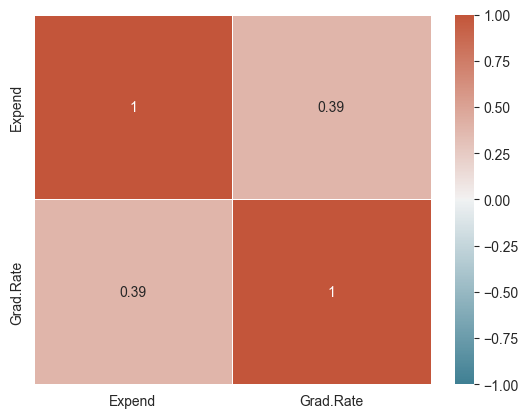

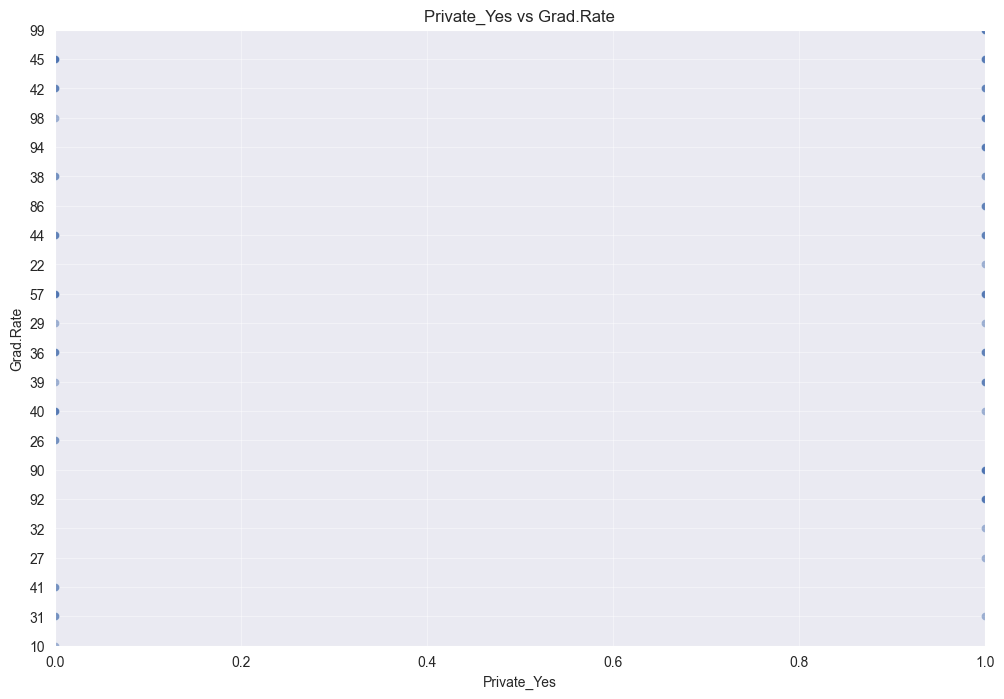

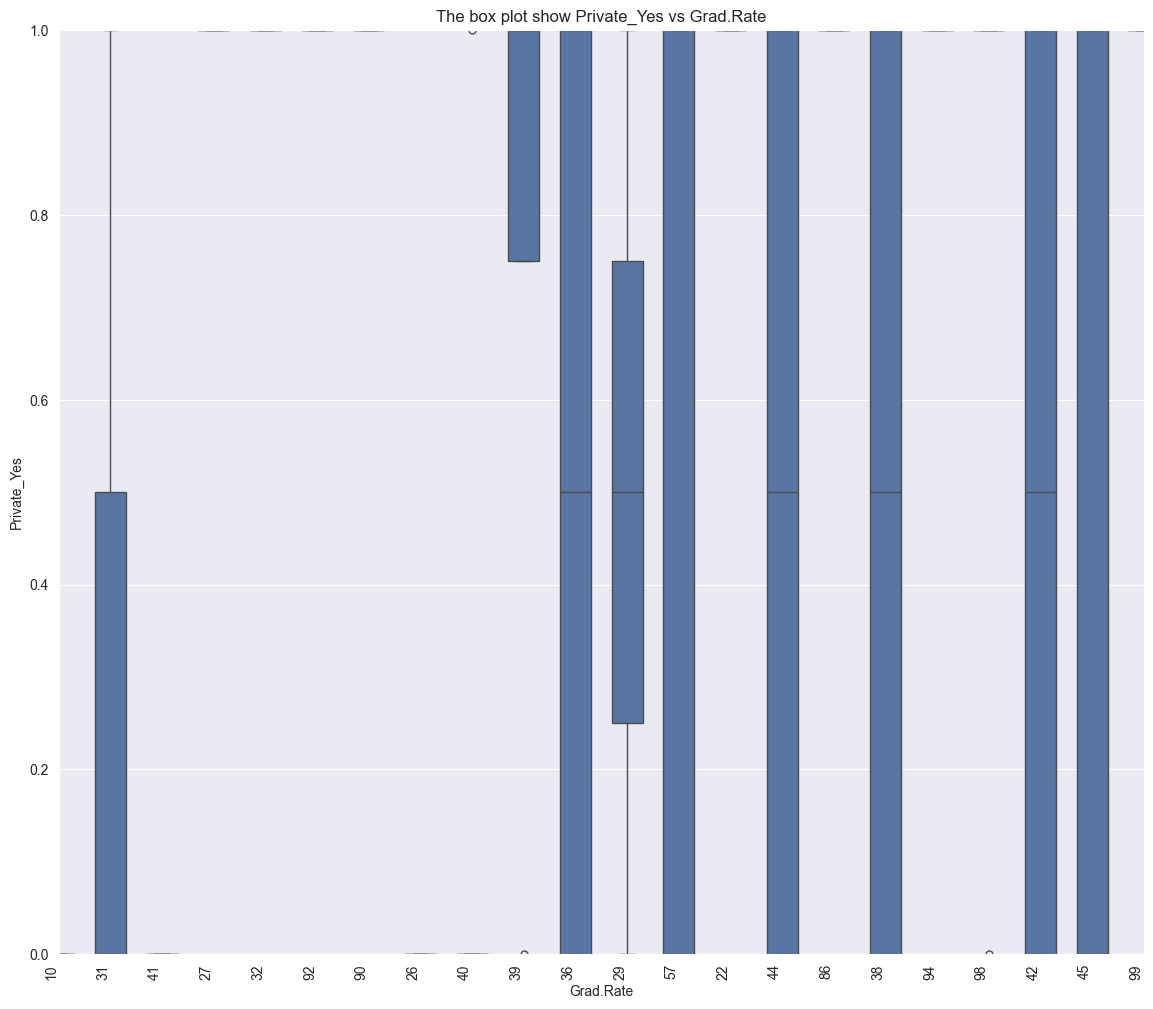

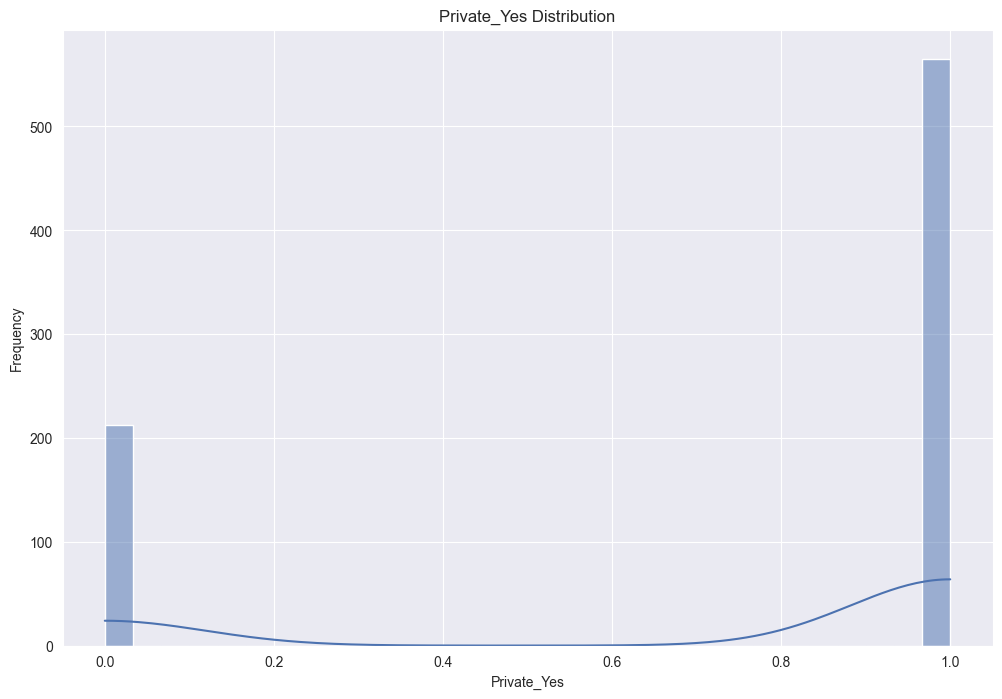

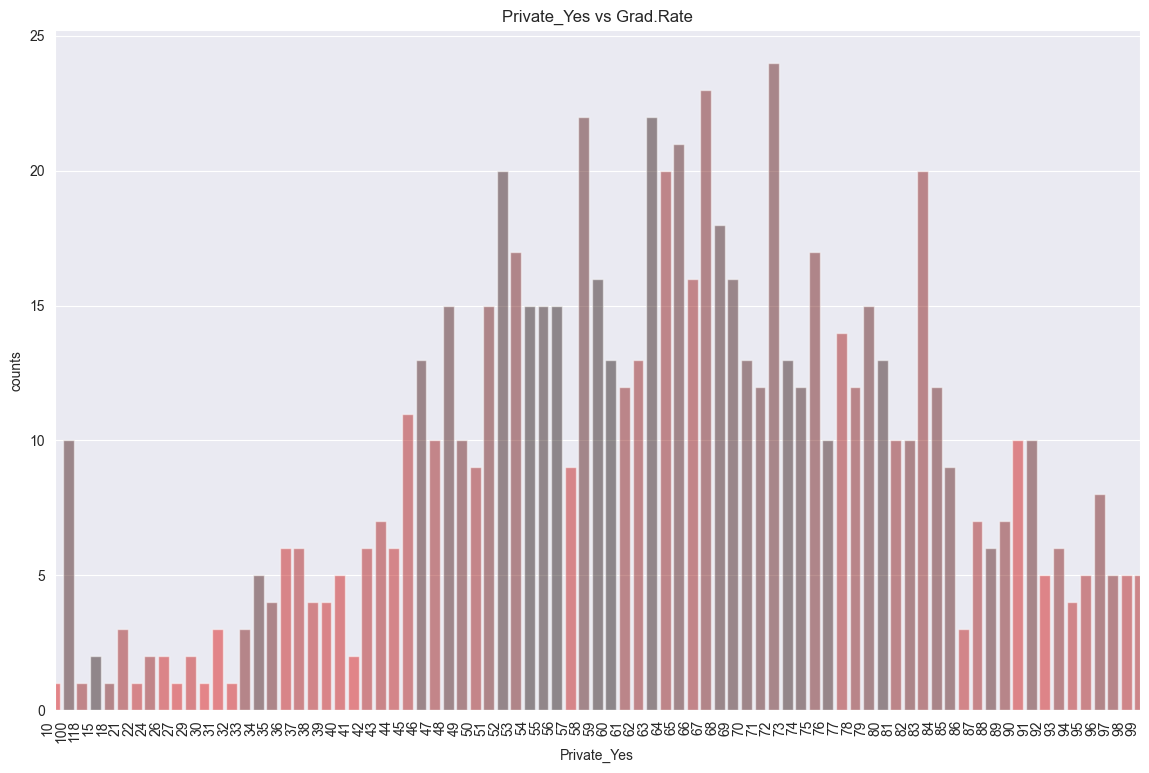

The correlation between Grad.Rate and Private_Yes is 0.3361622897143366


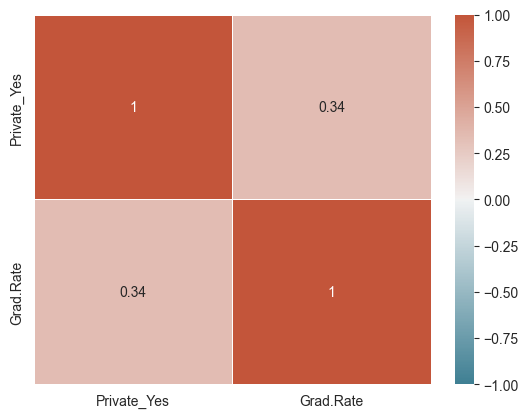

In [44]:

def analyze_graphs(data, column, target):
    #Differents graphs created to analyze the data
    #scatter plot
    data[column] =pd.to_numeric(data[column], errors='coerce')
    data[column] = data[column].dropna()
    sns.set_palette('deep')
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=data, x=column, y=target, alpha=0.5)
    plt.grid(True, alpha=0.4)
    plt.title(f"{column} vs {target}")
    plt.ylim(data[target].min(), data[target].max())
    plt.xlim(data[column].min(), data[column].max())
    plt.xlabel(column)
    plt.ylabel(target)
    plt.show()

      #box plot
    plt.figure(figsize=(14, 12))
    ax = sns.boxplot(data=data,x=target, legend=False,fliersize=5,y=column, width=0.6)
    plt.xlim(data[target].min(),  data[target].max())
    plt.ylim(data[column].min(), data[column].max())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plt.title(f"The box plot show {column} vs {target}")
    plt.show()

    #Histogram to visualize the data distribution
    plt.figure(figsize=(12,8))
    sns.histplot(data=data,bins=30, x=column,kde=True)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    #countplot
    plt.figure(figsize=(14,10))
    #convert target to categorical value
    data[target] =data[target].astype(str)
    plt.subplots_adjust(bottom=0.2)
    ax=sns.countplot(data=data, x= target, hue=target, alpha= 0.5,palette='dark:Red',
                  order=sorted(data[target].unique()))

    plt.xlim(data[target].min(), data[target].max())
    plt.title(f"{column} vs { target}")
    plt.xlabel(column)
    plt.ylabel('counts')
    #rotate
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plt.show()

    #calculate the correlation matrix
    correlation = data[[column, target]].corr().iloc[1,0]
    print(f'The correlation between {target} and {column} is {correlation}')
    #create a heatmap
    correlation = data[[column, target]].corr()
    color_map = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(correlation, cbar=True, vmin=-1, vmax=1, cmap=color_map,linewidths=.5,

                annot=True)
def analyze_all_columns(data, target):
    #analyze all columns against target
    column_features = [col for col in data.columns if col != target]
    #loop through column features
    for column in column_features:
        analyze_graphs(data,column, target )

analyze_all_columns(data=college_data,target='Grad.Rate')




2 Use the OLS() function to perform a multiple linear regression with Grad.Rate as the response and all other variables as the predictor

   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend Grad.Rate  Private_Yes  
0           12    7041        60            1  
1           16   10527        56

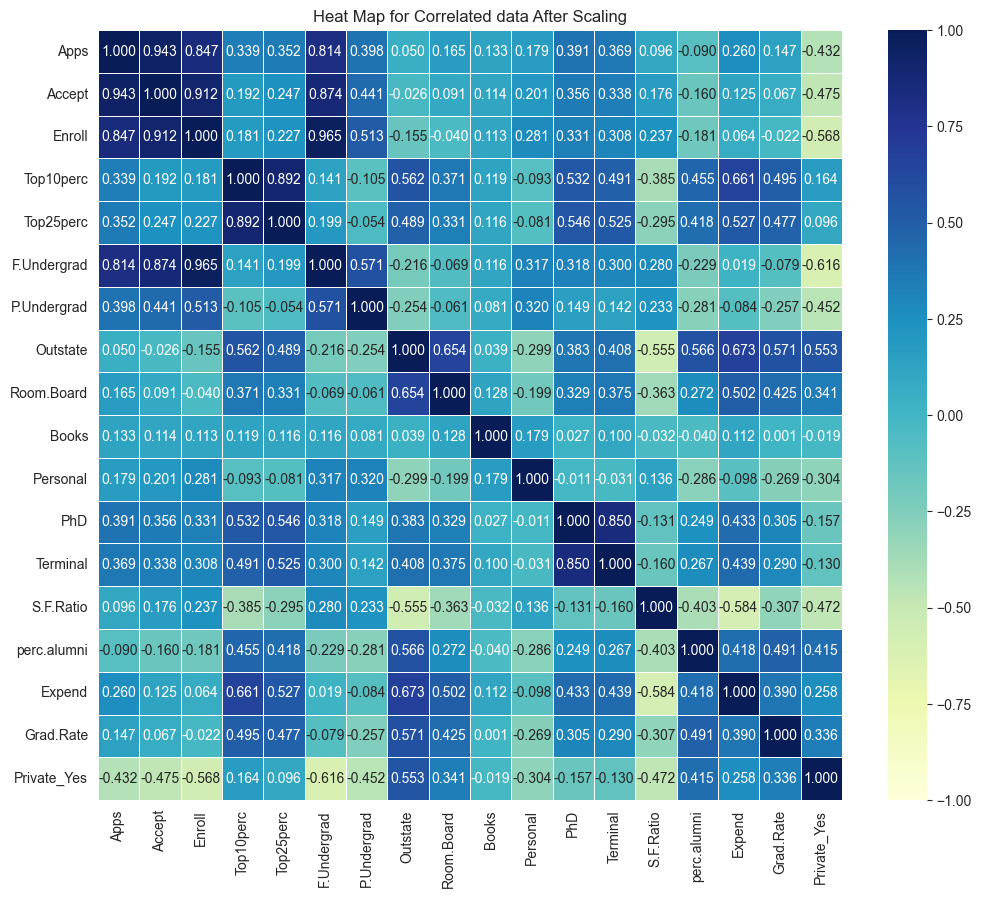

In [45]:
#using the RobustScaler to scaler my data
#initialize the RobustScaler
robust_scale= RobustScaler()
scale_data = robust_scale.fit_transform(college_data)
scaled_data =pd.DataFrame(scale_data, columns = college_data.columns)
print(college_data.head())

#correlation for the scale data
correlation = scaled_data.corr()

#create heat map
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap='YlGnBu',
            linewidth=.5, annot=True, fmt='.3f',
            vmin=-1, vmax=1
            ,cbar=True)
plt.title("Heat Map for Correlated data After Scaling")
plt.show()




In [46]:
x= scaled_data.drop(['Grad.Rate'], axis=1)

y= scaled_data['Grad.Rate']
print(scaled_data.head())
print(college_data['Grad.Rate'].isnull().sum())

#split the data into training and testing
x_train, x_test,y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=6)

#checking for null values in Grade rates
y_train = y_train.dropna()
#adjust the x_train
x_train = x_train.loc[y_train.index]
print(x_train.shape)

#add constants for the intercepts
lr_x_train = sm.add_constant(x_train)
lr_x_test = sm.add_constant(x_test)

#create a multiple linear regression and display results
results = sm.OLS(y_train, lr_x_train).fit()




       Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.035815  0.067033  0.434848       0.00  -0.071429     0.390972   
1  0.220506  0.447253  0.118182      -0.35  -0.892857     0.323930   
2 -0.045646 -0.007143 -0.148485      -0.05  -0.142857    -0.222702   
3 -0.400632 -0.418132 -0.450000       1.85   1.250000    -0.397278   
4 -0.479284 -0.529670 -0.574242      -0.35  -0.357143    -0.483903   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.211009 -0.454951   -0.619408 -0.384615  1.176471 -0.217391 -0.190476   
1     1.002294  0.408564    1.548520  1.923077  0.352941 -2.000000 -2.476190   
2    -0.291284  0.224799   -0.309704 -0.769231 -0.041176 -0.956522 -0.761905   
3    -0.332569  0.529884    0.860289 -0.384615 -0.382353  0.739130  0.714286   
4     0.591743 -0.433541   -0.055058  2.307692  0.352941  0.043478 -0.476190   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  Private_Yes  
0       0.90    -0.500000 -0.327531 

In [47]:
#3Use the summarize() function to print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     29.54
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           4.00e-68
Time:                        17:55:28   Log-Likelihood:                -466.16
No. Observations:                 621   AIC:                             968.3
Df Residuals:                     603   BIC:                             1048.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0064      0.034     -0.190      

4.RIDGE MODEL: Fit Ridge regression model

(777, 17)
       Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Private_Yes  
0   1.013776    -0.867574 -0.501910  

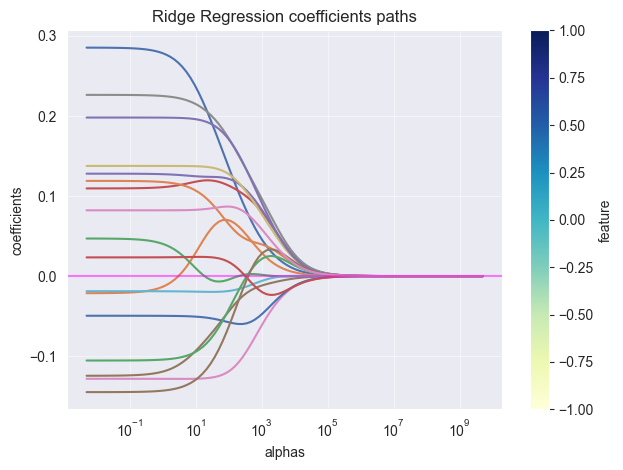

In [48]:

scaled_standard= scale(college_data) #scale it with Standardized scaler
college_data = pd.DataFrame(scaled_standard, columns = college_data.columns)



X = college_data.drop(['Grad.Rate'], axis=1)
print(X.shape)
Y = college_data['Grad.Rate']
print(X.head())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=6)
#generate the alphas
alphas = 10 ** np.linspace(10, -2, 100) * 0.5

#display the alphas
print(alphas)
#create the ridge model
model = Ridge()
coefficients = []  #coefficient list to store the model's coefficient values
for alpha in alphas:
    model.set_params(alpha=alpha)
    #fit the model
    model.fit(X_train,Y_train)
    #store each model's efficients
    coefficients.append(model.coef_)
print(np.shape(coefficients)) # (100, 17)


#plot the coefficients
ax = plt.gca() # fet current axis
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel("alphas")
plt.ylabel("coefficients")
plt.title("Ridge Regression coefficients paths")
plt.grid(True, which="both", ls='-',alpha=0.5)
#add horizontal line
plt.axhline(y=0,color='magenta', linestyle='-', alpha=0.5)

#create color bars
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1 , vmax=1),cmap=plt.cm.YlGnBu), ax=ax, label='feature')

#adjust spacing
plt.tight_layout()

plt.show()

In [49]:
#Peform cross validation to select best regularization parameter
ridge_model_cv = RidgeCV(alphas = alphas, scoring='r2') #select the best value using R squared score
ridge_model_cv.fit(X_train,Y_train)
#display the best alpha value
print(ridge_model_cv.alpha_)

#create the new_ridge model with best alpha
best_ridge_model = Ridge(alpha=ridge_model_cv.alpha_)

#train the best_ridge model
best_ridge_model.fit(X_train, Y_train)
#make prediction
y_hat = best_ridge_model.predict(X_test)

#Evaluate the models performance
r_squared = r2_score(Y_test, y_hat)
print(f"R_squared is {r_squared:.3f}")
pd.Series(best_ridge_model.coef_, index = X.columns)

115.5064850041579
R_squared is 0.488


Apps           0.129786
Accept         0.068968
Enroll        -0.003465
Top10perc      0.111925
Top25perc      0.120724
F.Undergrad   -0.041170
P.Undergrad   -0.117412
Outstate       0.168236
Room.Board     0.125845
Books         -0.018280
Personal      -0.058227
PhD            0.062160
Terminal      -0.037157
S.F.Ratio      0.016328
perc.alumni    0.167846
Expend        -0.057157
Private_Yes    0.086754
dtype: float64

#5 Fit LASSO regression model and comment on the results

(100, 17)


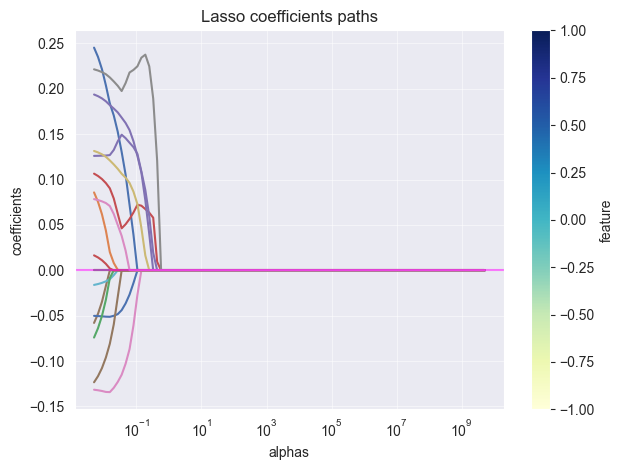

In [50]:
#Generate alphas for the LASSO
alpha_values = 10**np.linspace(10,-2,100)*0.5
lasso_model =Lasso()
coeffs = []
for alpha in alpha_values:
    #set the value of alphas
    lasso_model.set_params(alpha=alpha)
    lasso_model.fit(X_train,Y_train)
    coeffs.append(lasso_model.coef_)
print(np.shape(coeffs))
#plot the coefficients
ax = plt.gca() # fet current axis
ax.plot(alpha_values, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel("alphas")
plt.ylabel("coefficients")
plt.title("Lasso coefficients paths")
plt.grid(True, which="both", ls='-',alpha=0.5)
#add horizontal line
plt.axhline(y=0,color='magenta', linestyle='-', alpha=0.5)

#create color bars
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1 , vmax=1),cmap=plt.cm.YlGnBu), ax=ax, label='feature')

#adjust spacing
plt.tight_layout()

plt.show()

In [51]:
#Perform 10-fold cross-validation and select the best model using controlled randomness.
lass_model_cv = LassoCV(alphas=alpha_values, cv=10, random_state=42)
lass_model_cv.fit(X_train,Y_train)
print(f"{lass_model_cv.alpha_:.6f}")

#selecting the best lass model using the best alpha value
best_lasso_model = Lasso(alpha=lass_model_cv.alpha_)
best_lasso_model.fit(X_train, Y_train)
#y_hat
yHat =best_lasso_model.predict(X_test)
R_squared = r2_score(Y_test,yHat)
print(f"Best R_squared  for lasso model is {R_squared:.3f}")
pd.Series(best_lasso_model.coef_, index = X.columns)

0.020185
Best R_squared  for lasso model is 0.493


Apps           0.170689
Accept         0.000000
Enroll        -0.000000
Top10perc      0.079180
Top25perc      0.132703
F.Undergrad   -0.000000
P.Undergrad   -0.129431
Outstate       0.208173
Room.Board     0.116729
Books         -0.005317
Personal      -0.050034
PhD            0.008111
Terminal      -0.000000
S.F.Ratio      0.000000
perc.alumni    0.178298
Expend        -0.059521
Private_Yes    0.062111
dtype: float64